<img src="https://www.rephil.eu/images/emp-in.jpg" width="250" align="center">
<i><br>
<font size="5"><b>Εθνικό Μετσόβιο Πολυτεχνείο</b></font><br>
<font size="4">Σχολή Ηλεκτρολόγων Μηχανικών και Μηχανικών Υπολογιστών </font><br>
<font size="3">Τομέας Σημάτων, Ελέγχου και Ρομποτικής</font><br>
<font size="3">Εργαστήριο Όρασης Υπολογιστών, Επικοινωνίας Λόγου και Επεξεργασίας Σημάτων</font><br><br>
<font size="3"><b>Επεξεργασία Φωνής και Φυσικής Γλώσσας</b></font>
</i><br><br>

<i>
<font size="4"><b> Προπαρασκευή 3ου εργαστηρίου + 3ο Εργαστήριο</b></font><br>
<font size="4">Ακ. Έτος: 2019 - 2020</font><br>
<font size="3">Εξάμηνο: 7ο</font><br>
<br><br>
<font size="3"><b>Βασιλείου Βασιλική - 03115033</font><br>
<font size="3"><b>Ψαρουδάκης Ανδρέας - 03116001</font>
</i><br><br><br>

# Περιεχόμενα

## 1. [Προπαρασκευή 3ου εργαστηριου](http://localhost:8888/notebooks/Downloads/slp-lab3-prep-master/ProLab3.ipynb#%CE%9C%CE%AD%CF%81%CE%BF%CF%82-1:-%CE%A0%CF%81%CE%BF%CF%80%CE%B1%CF%81%CE%B1%CF%83%CE%BA%CE%B5%CF%85%CE%AE)

## 2. [3ο Εργαστήριο](http://localhost:8888/notebooks/Downloads/slp-lab3-prep-master/ProLab3.ipynb#%CE%9C%CE%AD%CF%81%CE%BF%CF%82-2:-%CE%95%CF%81%CE%B3%CE%B1%CF%83%CF%84%CE%AE%CF%81%CE%B9%CE%BF)
<br><br><br>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
ls

AttentionBiLSTM.json             dataloading.py  models_6_1.py
AttentionBiLSTM_predictions.txt  datasets/       models.py
AttentionBiLSTM.pt               embeddings/     ProLab3.ipynb
AttentionDNN.json                main.py         __pycache__/
AttentionDNN_predictions.txt     models_1_1.py   README.md
AttentionDNN.pt                  models_2_1.py   requirements.txt
AttentionLSTM.json               models_2_2.py   SelfAttention.py
AttentionLSTM_predictions.txt    models_3_1.py   training.py
AttentionLSTM.pt                 models_3_2.py   utils/
config.py                        models_4_1.py
dataloading_files/               models_4_2.py


In [3]:
cd "drive/My Drive/slp-lab3-prep-master.zip (Unzipped Files)/slp-lab3-prep-master"

/content/drive/My Drive/slp-lab3-prep-master.zip (Unzipped Files)/slp-lab3-prep-master


# Μέρος 1: Προπαρασκευή

## **Εισαγωγή**

Σκοπός της παρούσας εργαστηριακής άσκησης είναι η υλοποίηση μοντέλου για την __επεξεργασία και κατηγοριοποίηση κειμένων με την χρήση βαθιών νευρωνικών δικτύων (Deep Neural Networks - DNN)__. Για την ανάπτυξη των μοντέλων θα γίνει χρήση της βιβλιοθήκης __Pytorch__. Αρχικά, με χρήση προ-εκπαιδευμένων διανυσματικών αναπαραστάσεων λέξεων (pretrained word embeddings), καλούμαστε να δημιουργήσουμε αναπαραστάσεις για κάθε κείμενο. Στη συνέχεια, θα χρησιμοποιήσουμε τις αναπαραστάσεις των κειμένων, ώστε να κάνουμε την κατηγοριοποίηση. Στόχος είναι να εκπαιδεύσουμε τα μοντέλα, ώστε αυτά να μπορούν να κάνουν ανάλυση συναισθήματος(sentiment analysis) σε προτάσεις. Για την εκπαίδευση των μοντέλων μας παρέχονται τα 2 ακόλουθα σύνολα δεδομένων:

 - __Sentence Polarity Dataset2__ [Pang and Lee, 2005]:  To dataset αυτό περιέχει 5331 θετικές και 5331 αρνητικές κριτικές ταινιών,από το Rotten Tomatoes και είναι binary-classification πρόβλημα(positive, negative)
 
- __Semeval 2017 Task4-A3__ [Rosenthal et al., 2017]:  To dataset αυτό περιέχει tweets τα οποία είναι κατηγοριοποιημένα σε 3 κλάσεις (positive,  negative,  neutral) με 49570 παραδείγματα εκπαίδευσης και 12284 παραδείγματα αξιολόγησης.

## **1. Περιβάλλον Ανάπτυξης**

Στήνουμε το περιβάλλον ανάπτυξης στον υπολογιστή μας. Αρχικά, κατεβάζουμε το αποθετήριο: https://github.com/slp-ntua/slp-lab3-prep. Στην συνέχεια, επιλέγουμε να κατεβάσουμε τα προεκπαιδευμένα διανύσματα λέξεων __GloVe embeddings__ στον φάκελο __/embeddings__ του project καθώς υπάρχουν διαθέσιμα embeddings σε χαμηλές διαστάσεις (περιέχει ακόμα και 50-διάστατα embeddings), το οποίο σημαίνει λιγότερες υπολογιστικές απαιτήσεις. Εναλλακτικά θα μπορούσαμε να χρησιμοποιήσουμε και τα __FastText  embeddings__, τα οποία ωστόσο είναι διαθέσιμα μόνο σε 300 διαστάσεις. Χρειάζεται ακόμα να εγκαταστήσουμε ορισμένες βιβλιοθήκες για την υλοποίηση της άσκησης. Η εγκατάσταση αυτή θα γίνει σε ένα ανεξάρτητο περιβάλλον, ώστε να μην υπάρξουν διενέξεις με τις υπόλοιπες βιβλιοθήκες στον υπολογιστή μας. Για το σκοπό αυτό θα κάνουμε χρήση του εργαλείου __conda__. Ετσι λοιπόν, δημιουργούμε ένα νέο περιβάλλον και το ενεργοποιούμε με τις ακόλουθες εντολές:

 __conda create -n slp3 python=3__                                                                                                                    
 __source activate slp3__

Έπειτα, εγκαθιστούμε το __PyTorch__ εκτελώντας την ακόλουθη εντολή:

__conda install pytorch torchvision cudatoolkit=10.1 -c pytorch__

και στη συνέχεια όλες τις υπόλοιπες βιβλιοθήκες με την εντολή:

__pip install -r requirements.txt__

__Σημείωση__: Για την αποφυγή ορισμένων errors που προέκυπταν τροποποιήσαμε το αρχείο requirements.txt θέτοντας την έκδοση του numpy σε 1.17.1 (numpy==1.17.1)

## **1. Προεπεξεργασία Δεδομένων**

Σε αυτό το βήμα θα πρέπει να επεξεργαστούμε τα δεδομένα, ώστε να μπορέσουμε να εκπαιδεύσουμε στη συνέχεια το νευρωνικό δίκτυο. Για την καλύτερη διαχείριση των δεδομένων εκπαίδευσης θα χρησιμοποιήσουμε τα εργαλεία που παρέχει το PyTorch (κλάσεις __Dataset__ και __Dataloader__),κληρονομώντας τις αντίστοιχες κλάσεις και φτιάχνοντας δικές μας. Η κλάση __torch.utils.data.Dataset__ μετατρέπει κάθε παράδειγμα στην μορφή που απαιτείται για την εκπαίδευση του νευρωνικού δικτύου και η κλάση __torch.utils.data.Dataloader__ χρησιμοποιεί ένα στιγμιότυπο της κλάσης Dataset για να μετατρέψει τα παραδείγματα του σε torchTensors και να τα οργανώσει σε mini-batces. Η επέκταση της κλάσης __Dataset__ που θα υλοποιήσουμε θα περιέχει τις μεταβλητές με τα παραδείγματα και τις επισημειώσεις (labels) κάθε συνόλου δεδομένων,καθώς και τις μεθόδους για την επεξεργασία και την προετοιμασία τους.

<font size="4"><b>1.1 Κωδικοποίηση Επισημειώσεων(Labels)</b></font> 

Αρχικά, οι επισημειώσεις (labels) των παραδειγμάτων εκπαίδευσης έχουν την μορφή κειμένου (positive, neutral, negative...). Τις κωδικοποιούμε με χρήση του __LabelEncoder__ του __scikit-learn__ ώστε κάθε κλάση να αντιστοιχεί σε έναν συγκεκριμένο αριθμό. Η αντιστοίχηση είναι ίδια για training και test sets.

<u> __Ζητούμενο 1</u>__ : Συμπληρώστε τα κενά στη θέση __main.py:EX1__ και τυπώστε τα πρώτα 10 labels από τα δεδομένα εκπαίδευσης και τις αντιστοιχίες τους σε αριθμούς.

Για την υλοποίηση των προηγουμένων εκτελούμε τον εξής κώδικα:

```python
print("loading word embeddings...")
word2idx, idx2word, embeddings = load_word_vectors(EMBEDDINGS, EMB_DIM)

# load the raw data
for DATASET in DATASETS:
	if DATASET == "Semeval2017A":
    		X_train, y_train, X_test, y_test = load_Semeval2017A()
	elif DATASET == "MR":
    		X_train, y_train, X_test, y_test = load_MR()
	else:
    		raise ValueError("Invalid dataset")

	# convert data labels from strings to integers
	le = LabelEncoder()

	y_train = le.fit_transform(y_train)  # EX1
	y_test = le.fit_transform(y_test)    # EX1
	n_classes = le.classes_.size         # EX1

	print("------------------- EX1 -", DATASET, "-------------------")
	print("The first 10 unencoded labels from the training set are: ")
	print(le.inverse_transform(y_train[:10]))
	print("The first 10 encoded labels from the training set are: ")
	print(y_train[:10])

```

Τα αποτελέσματα που πήραμε εκτελώντας το προηγούμενο κομμάτι της main.py στο bash είναι:

<a href="https://ibb.co/SxFz3Zr"><img src="https://i.ibb.co/GJzq5rT/Screenshot-from-2020-01-12-23-35-39.png" alt="Screenshot-from-2020-01-12-23-35-39" border="0"></a>

<font size="4"><b>1.2 Λεκτική Ανάλυση (Tokenization)</b></font>  

Θέλουμε τώρα να μετατρέψουμε τα δεδομένα μας από κείμενα σε ακολουθίες από tokens. Στο αρχείο __dataloading.py__ έχει δηλωθεί η κλάση __SentenceDataset__,η οποία επεκτείνει την κλάση __torch.utils.data.Dataset__ . Εκτελούμε το __tokenization__ κατά την αρχικοποίηση του __Dataset__ σε όλα τα δεδομένα του και διατηρούμε τα επεξεργασμένα δεδομένα σε μεταβλητή στην κλάση. Ανάλογα με τις ιδιαιτερότητες του dataset μας χρησιμοποιούμε διαφορετικούς tokenizers. Συγκεκριμένα, για το __Semeval2017A dataset__ που περιέχει tweets θα χρησιμοποιήσουμε τον __TweetTokenizer__ της βιβλιοθήκης __nltk__ ενώ για το MR dataset, του οποίου τα κείμενα δεν εμφανίζουν κάποια μεγάλη ιδιαιτερότητα, μπορούμε να χρησιμοποιήσουμε κάποιον δικό μας tokenizer και να μην κάνουμε χρήση κάποιου έτοιμου.

<u> __Ζητούμενο 2</u>__ : Συμπληρώστε τα κενά στη θέση __dataloading.py:EX2__ και τυπώστε τα πρώτα 10 παραδείγματα από τα δεδομένα εκπαίδευσης.

Το τμήμα κώδικα του αρχείου __dataloading.py__  το οποίο θα συμπληρώσουμε είναι __αρχικά__ ως εξής:
```python
def __init__(self, X, y, word2idx):
    """
    In the initialization of the dataset we will have to assign the
    input values to the corresponding class attributes
    and preprocess the text samples

    -Store all meaningful arguments to the constructor here for debugging
     and for usage in other methods
    -Do most of the heavy-lifting like preprocessing the dataset here


    Args:
        X (list): List of training samples
        y (list): List of training labels
        word2idx (dict): a dictionary which maps words to indexes
    """

    # self.data = X
    # self.labels = y
    # self.word2idx = word2idx

    # EX2
    raise NotImplementedError
```

__Μετά την συμπλήρωση του κώδικα__ για το Ζητούμενο2 ο κώδικας έχει την ακόλουθη εικόνα:

    
```python
    def __init__(self, X, y, word2idx,DATASET):
        """
        In the initialization of the dataset we will have to assign the
        input values to the corresponding class attributes
        and preprocess the text samples

        -Store all meaningful arguments to the constructor here for debugging
         and for usage in other methods
        -Do most of the heavy-lifting like preprocessing the dataset here


        Args:
            X (list): List of training samples
            y (list): List of training labels
            word2idx (dict): a dictionary which maps words to indexes
        """
        # EX2
        if DATASET == "Semeval2017A":
            tweetToken = TweetTokenizer()
            self.data = [tweetToken.tokenize(example) for example in X]
        elif DATASET == "MR":
            self.data = []
            for sample in X:
                new_string = sample.strip()
                new_string = new_string.lower()
                for punctuation in string.punctuation:
                    new_string = new_string.replace(punctuation,' ')
                new_string = "".join((char for char in new_string if char.isalpha() or char.isspace()))
                new_string = new_string.replace("\n", " ")
                new_string = new_string.split()
                self.data.append(new_string)
        else:
            raise ValueError("Invalid dataset")
        self.labels = y
        self.word2idx = word2idx
```

Τα αποτελέσματα που πήραμε εκτελώντας το εως τώρα κομμάτι της main.py χωρίς την εμφάνιση των αποτελεσμάτων του προηγούμενου ερωτήματος στο bash είναι:

<a href="https://ibb.co/pfzZgBy"><img src="https://i.ibb.co/Jv72NwQ/Screenshot-from-2020-01-13-02-44-33.png" alt="Screenshot-from-2020-01-13-02-44-33" border="0"></a>
<a href="https://ibb.co/N99chSD"><img src="https://i.ibb.co/5rrbDFp/Screenshot-from-2020-01-13-02-45-35.png" alt="Screenshot-from-2020-01-13-02-45-35" border="0"></a>

<font size="4"><b> 1.3 Κωδικοποίηση Παραδειγμάτων (Λέξεων)</b></font>  

Αυτό είναι το τελικό βήμα,στο οποίο θα πρέπει να προετοιμάσουμε κάθε παράδειγμα στην κατάλληλη μορφή για την εκπαίδευση
του νευρωνικού δικτύου. 

<u> __Ζητούμενο 3</u>__ : Υλοποιήστε τη μέθοδοgetitemτης κλάσηςSentenceDataset(θέσηdataloading.py:EX3)και τυπώστε5παραδείγματα στην αρχική τους μορφή και όπως τα επιστρέφειη κλάσηSentenceDataset.

Απαιτείται να υλοποιήσουμε τα εξής:

1. Κάθε όρος(token - term) πρέπει να χαρτογραφηθεί σε ένα αριθμό,ώστε να μπορεί το embedding layer να τον αντιστοιχίσει στη σωστή διανυσματική αναπαράσταση (word embedding). Αρχικά "πλοτάρουμε" τα αρχικά μας δεδομένα και όπως βλέπουμε και στο σχήμα που ακολουθεί υπάρχον κάποιες outliers τιμές,<a href="https://ibb.co/yQNN2PT"><img src="https://i.ibb.co/5R11Z4D/imgonline-com-ua-twotoone-Er-COT75-GNo.png" alt="imgonline-com-ua-twotoone-Er-COT75-GNo" border="0"></a> τις οποίες αφαιρούμε μέσω του κώδικα που προσθέτουμε στην συνάρτηση init της κλάσης SentenceDataset. Συγκεκριμένα κρατάμε μόνο τις τιμές που βρίσκονται γύρω από την μέση τιμή +- 2 * τυπική αποκλιση. Ενώ παράλληλα επιλέγουμε ως best length το 0.8 * την μέγιστη τιμή ώστε να αποκλίσουμε κάποιες επιπλέον μεγάλες τιμές που έχουν απομείνει και δεν αφορούν την πλειοψηφία. Η συνάρτηση λοιπόν γίνεται:

```python
    def __init__(self, X, y, word2idx,DATASET):
        """
        In the initialization of the dataset we will have to assign the
        input values to the corresponding class attributes
        and preprocess the text samples

        -Store all meaningful arguments to the constructor here for debugging
         and for usage in other methods
        -Do most of the heavy-lifting like preprocessing the dataset here


        Args:
            X (list): List of training samples
            y (list): List of training labels
            word2idx (dict): a dictionary which maps words to indexes
        """
        # EX2
        if DATASET == "Semeval2017A":
            tweetToken = TweetTokenizer()
            self.data = [tweetToken.tokenize(example) for example in X]
        elif DATASET == "MR":
            self.data = []
            for sample in X:
                new_string = sample.strip()		# remove all the leading and trailing spaces from a string
                new_string = new_string.lower()		# lowercase string
                for punctuation in string.punctuation:	# remove punctuation
                    new_string = new_string.replace(punctuation,' ')
                # Keeps only letters and spaces
                new_string = "".join((char for char in new_string if char.isalpha() or char.isspace()))		
                new_string = new_string.replace("\n", " ")		# replace newlines with spaces
                # use split without parameter to split the words indipendently of spaces number
                new_string = new_string.split()			
                self.data.append(new_string)
        else:
            raise ValueError("Invalid dataset")
        self.labels = y
        self.word2idx = word2idx

        # raise NotImplementedError
        
        #EX3
        init_len = [len(sample) for sample in self.data]
        init_len_mean = np.mean(init_len)
        init_len_std = np.std(init_len)
        upper_bound = init_len_mean+2*init_len_std
        lower_bound = init_len_mean-2*init_len_std
        without_outl_len = [l for l in init_len if l >= lower_bound and l <= upper_bound]
        without_outl_len = sorted(without_outl_len)
        self.best_len = without_outl_len[ceil(0.8*len(without_outl_len))]
```

2. Όλα τα παραδείγματα θα πρέπει να έχουν το ίδιο μήκος. Αυτό είναι αναγκαίο για να μπορούν να εκτελεστούν πράξεις γραμμικής άλγεβρας,όπως πολλαπλασιασμός πινάκων. Αφού επιλέξαμε λοιπόν το καλύτερο μήκος πρέπει στην συνέχεια οποιαδήποτε πρόταση να έχει το μήκος αυτό. Για να μπορέσουμε να μεγαλώσουμε τις μικρές προτάσεις αρχικαποιήσαμε τον πίνακα example με μηδενικά και στην συνέχεια τον γεμίσαμε με τις ___word2idx___ αντιστοιχίσεις. Στην περίπτωση που μία λέξη δεν έχει αντιστοίχιση την αντιστοιχίζουμε με τον όρο < unk>. Όσο αναφορά τις μεγαλύτερες προτάσεις για να τις μικρύνουμε, απλά κόψαμε τις αντιστοιχήσεις των επιπλέον όρων. Για να τα επιτύχουμε αυτά προσθέσαμε στην get_item τον εξής κώδικα:
```python
    def __getitem__(self, index):
       """
       Returns the _transformed_ item from the dataset
       Args:
           index (int):
       Returns:
           (tuple):
               * example (ndarray): vector representation of a training example
               * label (int): the class label
               * length (int): the length (tokens) of the sentence
       Examples:
           For an `index` where:
           ::
               self.data[index] = ['this', 'is', 'really', 'simple']
               self.target[index] = "neutral"
           the function will have to return something like:
           ::
               example = [  533  3908  1387   649   0     0     0     0]
               label = 1
               length = 4
       """
       # EX3
       i = 0
       example = np.zeros(self.best_len, dtype = np.int64)
       for word in self.data[index]:
           if i < self.best_len:
               if word in self.word2idx.keys():
                   example[i] = (self.word2idx[word])
               else:
                   example[i] = (self.word2idx['<unk>'])
               i += 1
       length = len(self.data[index])
       label = self.labels[index]
       return example, label, length
```
Στη συνέχεια παρουσιάζουμε τα πέντα πρώτα αποτελέσματα με την μορφή που δίνονται και στην εκφώνηση, εκτελώντας το εως τώρα κομμάτι της main.py χωρίς την εμφάνιση των αποτελεσμάτων των προηγούμενων ερωτημάτων:

<a href="https://ibb.co/JF7pbHM"><img src="https://i.ibb.co/HpzPMqk/Screenshot-from-2020-01-13-23-09-42.png" alt="Screenshot-from-2020-01-13-23-09-42" border="0"></a>
<a href="https://ibb.co/gRxPGyY"><img src="https://i.ibb.co/rwVcgk9/Screenshot-from-2020-01-13-23-10-13.png" alt="Screenshot-from-2020-01-13-23-10-13" border="0"></a>
<a href="https://ibb.co/rdLCkVj"><img src="https://i.ibb.co/Z2wnd0j/Screenshot-from-2020-01-13-23-11-37.png" alt="Screenshot-from-2020-01-13-23-11-37" border="0"></a>
<a href="https://ibb.co/svKTgJh"><img src="https://i.ibb.co/HDtcKp0/Screenshot-from-2020-01-13-23-12-07.png" alt="Screenshot-from-2020-01-13-23-12-07" border="0"></a>

## **2. Μοντέλο**

<font size="4"><b>  2.1  Embedding Layer </b></font>

Στο ερώτημα αυτό καλούμαστε να υλοποιήσουμε τα εξής:
- Να δημιουργήσουμε ένα embedding layer.
- Να αρχικοποιήσσουμε τα βάρη του δικτύου από τα προεκπαιδευμένα word embeddings.
- Παγώσουμε το embedding layer, δηλαδή να δηλώσουμε ότι τα βάρη του δικτύου δεν θα ενημερωθούν περαιτέρω κατά την εκπαίδευση του μοντέλου.

<u> __Ζητούμενο 4</u>__ : Συμπληρώστε τα κενά στις θέσεις models.py:EX4 και απαντήστε στα ερωτήματα.

Προσθέσαμε λοιπόν στην συνάρτηση init της κλάσης BaselineDNN τον εξής κώδικα (_# EX4_):
```python
    def __init__(self, output_size, embeddings, trainable_emb=False):
        """

        Args:
            output_size(int): the number of classes
            embeddings(bool):  the 2D matrix with the pretrained embeddings
            trainable_emb(bool): train (finetune) or freeze the weights
                the embedding layer
        """

        super(BaselineDNN, self).__init__()
        num_emb, dim_emb = embeddings.shape
        
        # 1 - define the embedding layer
        self.embedding = nn.Embedding(num_embeddings = num_emb, embedding_dim = emb_dim) # EX4

        # 2 - initialize the weights of our Embedding layer
        # from the pretrained word embeddings
        self.embedding.weights(torch.from_numpy(embeddings))   # EX4

        # 3 - define if the embedding layer will be frozen or finetuned
        if not trainable_emb:
	    self.embeddings.weight.requires_grad = False # EX4

        # 4 - define a non-linear transformation of the representations
        ...  # EX5

        # 5 - define the final Linear layer which maps
        # the representations to the classes
        ...  # EX5
```
<br><br>

__Γιατί αρχικοποιούμε το embedding layer με τα προ-εκπαιδευμένα word embeddings?__

Ο λόγος για τον οποίο αρχικοποιούμε το __embedding layer__ με τα __προ-εκπαιδευμένα word embeddings__ είναι ότι θέλουμε από την αρχή τα embeddings να __μην είναι τυχαία__ αλλά να αναπαριστούν τις __σημασιολογικά παρόμοιες λέξεις κοντά στον πολυδιάστατο χώρο__. Έτσι, πραγματοποιείται πιο ποιοτική και γρήγορη εκπαίδευση του νευρωνικού μας δικτύου. Αν αρχικοποιούσαμε το embedding layer με τυχαίες τιμές και το αφήναμε να εκπαιδευτεί πάνω στα δεδομένα μας τότε θα ηταν πολύ πιο δύσκολο για το νευρωνικό να βρει κάποιο μοτίβο σε αυτά τα unstructered δεδομένα καθώς αυτά θα αναπαρηστούσαν τις λέξεις εντελώς τυχαία στο χώρο και θα καταλήγαμε σε κάποια προσέγγιση η οποία θα απείχε αρκετά από αυτό που επιθυμούμε. Μάλιστα,η τυχαία αναπάραση των λέξεων στο χώρο και η εκπαίδευση του νευρωνικού δικτύου με αυτές θα οδηγούσε σε καθυστέρηση εξαγωγής της σωστής αναπαράστασης και κατά συνέπεια σε μειωμένη ακρίβεια. 

<br><br>

__Γιατί κρατάμε παγωμένα τα βάρη του embedding layer κατά την εκπαίδευση?__

Τα __βάρη του embedding layer__ λειτουργούν ως παράμετροι. Το να κρατάμε τα βάρη αυτά παγωμένα πρακτικά ισοδυναμεί με τη διατήρηση των παραμέτρων σταθερών. 

Η χρήση αυτής της τεχνικής κατά την εκπαίδευση έχει __δύο σημαντικά πλεονεκτήματα__:

1. __Αποφεύγεται το overfitting__ το οποίο είναι πολύ πιθανό να συμβεί αν εκτός από το νευρωνικό είχαμε και τις αναπαραστάσεις που μπαίνουν σε αυτό να εκπαιδεύονται πάνω στο train set μας. Σε αυτή την περίπτωση ο αλγόριθμος δεν θα μπορεί να γενικεύσει και θα καταλήξουμε με ένα μοντέλο που απλά έχει μάθει πολύ καλά τα δεδομένα που του δώσαμε.

2. Μειώνονται οι συνολικές παράμετροι του μοντέλου μας __κερδίζοντας έτσι σε υπολογιστική πολυπλοκότητα__. Η συνεισφορά αυτής της τεχνικής είναι σημαντική στην ταχύτητα εκτέλεσης της εκπαίδευσης. Η μη τροποποίηση των παραμέτρων ουσιαστικά ισοδυναμεί με μη διεξαγωγή του backward pass, με αποτέλεσμα τη σημαντική αύξηση της ταχύτητας, σχεδόν στο διπλάσιο καθώς η μισή διαδικασία παραλείπεται.

<font size="4"><b>  2.2  Output Layer(s) </b></font>

Στο ερώτημα αυτό καλούμαστε να υλοποιήσουμε τα εξής:
- Να δημιουργήσουμε ένα layer με μία μη γραμμική συνάρτηση ενεργοποίησης, το οποίο θα μαθαίνει ένα μετασχηματισμό της αναπαράστασης κάθε παραδείγματος.
- Να δημιουργήσουμε το τελευταίο layer το οποίο προβάλει τις τελικές αναπαραστάσεις των κειμένωνσ τις κλάσεις.

<u> __Ζητούμενο 5</u>__ : Συμπληρώστε τα κενά στις θέσεις models.py:EX5 και απαντήστε στα ερωτήματα.

Προσθέσαμε λοιπόν στην συνάρτηση init της κλάσης BaselineDNN τον εξής κώδικα (# EX5):
```python
    def __init__(self, output_size, embeddings, trainable_emb=False):
        """

        Args:
            output_size(int): the number of classes
            embeddings(bool):  the 2D matrix with the pretrained embeddings
            trainable_emb(bool): train (finetune) or freeze the weights
                the embedding layer
        """

        super(BaselineDNN, self).__init__()
        num_emb, dim_emb = embeddings.shape
        
        # 1 - define the embedding layer
        self.embedding = nn.Embedding(num_embeddings = num_emb, embedding_dim = emb_dim) # EX4

        # 2 - initialize the weights of our Embedding layer
        # from the pretrained word embeddings
        self.embedding.weight.data.copy_(torch.from_numpy(embeddings)) # EX4

        # 3 - define if the embedding layer will be frozen or finetuned
        if not trainable_emb:
	    self.embedding.weights.requires_grad = False # EX4

        # 4 - define a non-linear transformation of the representations
        self.linear_hid = nn.Linear(dim_emb, 256) # EX5
        self.relu = nn.ReLU() # EX5

        # 5 - define the final Linear layer which maps
        # the representations to the classes
        self.linear = nn.Linear(256, output_size) # EX5
```

<br><br>

__Γιατί βάζουμε μία μη γραμμική συνάρτηση ενεργοποίησης στο προτελευταίο layer?Τι διαφορά θα είχε αν είχαμε 2 ή περισσότερους γραμμικούς μετασχηματισμούς στη σειρά?__

Η εισαγωγή μιας μη γραμμικής συνάρτησης ενεργοποιήσης στο προτελευταίο layer γίνεται ώστε να εισάγουμε την μη
γραμμικότητα στο μοντέλο και αυτό να μπορέσει να __αντιστοιχίσει με μεγαλύτερη επιτυχία την είοσοδο στην έξοδο__. Αν απλά είχαμε 2 ή περισσότερους γραμμικούς μετασχηματισμούς στη σειρά τότε αυτό θα ισοδυναμούσε με ένα απλό perceptron αφού το γινόμενο γραμμικών συναρτήσεων έχει ως αποτέλεσμα μια γραμμική συνάρτηση. Το νευρωνικό δίκτυο θα είχε τότε μειωμένη ακρίβεια καθώς θα μπορούσε να πραγματοποιήσει μια σωστή αντιστοίχιση μόνο για ένα πολύ περιορισμένο εύρος. Έτσι λοιπόν, προτιμάται η χρήση μιας μη γραμμικής συνάρτησης ενεργοποίησης για το προτελευταίο layer (βαθμού >1) η οποία αυξάνει την πολυπλοκότητα αλλά βελτιώνει σημαντικά τις επιδόσεις.

<font size="4"><b>  2.3  Forward pass </b></font> 

Στο ερώτημα αυτό καλούμαστε να υλοποιήσουμε τα εξής:
- Να προβάλλουμε τις λέξεις κάθε πρότασης με το embedding layer που δημιουργήσαμε, όπου κάθε όρος(λέξη) θα αντιστοιχεί σε ένα διάνυσμα.
- Να δημιουργήσουμε μία αναπαράσταση για κάθε πρόταση, υπολογίζοντας τον μέσο όρο(κέντρο βάρους) των word embeddings σε μία πρόταση.
- Να εφαρμόσουμε τον μη-γραμμικό μετασχηματισμό που σχεδιάσαμε στο προηγούμενο ερώτημα σε κάθε αναπαράσταση και δημιουργήσουμε καινούριες αναπαραστάσεις.
- Να προβάλουμε τις τελικές αναπαραστάσεις στον χώρο των κλάσεων.

<u> __Ζητούμενο 6</u>__ : Συμπληρώστε τα κενά στις θέσεις models.py:EX6 και απαντήστε στα ερωτήματα.

Προσθέσαμε λοιπόν στην συνάρτηση forward της κλάσης BaselineDNN τον εξής κώδικα (# EX6):
Προσθέσαμε λοιπόν στην συνάρτηση init της κλάσης BaselineDNN τον εξής κώδικα (# EX5):
```python
    def __init__(self, output_size, embeddings, trainable_emb=False):
        """
        This is the heart of the model.
        This function, defines how the data passes through the network.

        Returns: the logits for each class

        """

        # 1 - embed the words, using the embedding layer
        embeddings = self.embedding(x)  # EX6

        # 2 - construct a sentence representation out of the word embeddings
        representations = torch.zeros([len(x), embeddings.shape[2]])  # EX6
        for i in range(batch_size):
           representations[i] = torch.sum(embeddings[i], dim=0) / lengths[i] # EX6

        # 3 - transform the representations to new ones.
        representations = self.relu(self.linear_hid(representations)) # EX6

        # 4 - project the representations to classes using a linear layer
        logits = self.linear(representations) # EX6

        return logits
```
<br><br>

__Αν θεωρήσουμε ότι κάθε διάσταση του embedding χώρου αντιστοιχεί σε μία αφηρημένη έννοια, μπορείτε να δώσετε μία διαισθητική ερμηνεία για το τι περιγράφει η αναπαράσταση που φτιάξατε (κέντρο-βάρους) ?__

Στο μοντέλο που κατασκευάσαμε, η αναπαράσταση μιας πρότασης προκύπτει από το κέντρο βάρους των embeddings των λέξεων που απαρτίζουν την πρόταση. Έτσι, οι προτάσεις, οι οποίες αποτελούνται από λέξεις (διανύσματα στον πολυδιάστατο χώρο) συνιστούν και αυτές διανύσματα τα οποία σε κάθε διάσταση περιέχουν το μέσο όρο των τιμών των λέξεων που τις απαρτίζουν στην διάσταση αυτή. Αυτό πρακτικά μας δείχνει ότι η αναπαράσταση μας εκφράζει μια έννοια αν και μόνο αν οι λέξεις που την απαραρτίζουν εκφράζουν την ίδια σημασιολογική έννοια. Με άλλα λόγια, μπορούμε να δούμε την σχέση που έχει μια πρόταση με μια συγκεκριμένη αφηρημένη έννοια απλά κοιτώντας την τιμή της σε αυτήν την διάσταση. Ωστόσο, η αναπαράσταση αυτή δεν λαμβάνει υπόψιν της τα συντακτικά χαρακτηριστικά και έτσι υπάρχει το ενδεχόμενο να μην είναι απόλυτα ορθή η αποτύπωση των εννοιών που εμπεριέχεται σε μια πρόταση.

<br><br>

__Αναφέρετε πιθανές αδυναμίες της συγκεκριμένης προσέγγισης για να αναπαραστήσουμε κείμενα.__

Η σημαντικότερη αδυναμία της συγκεκριμένης προσέγγισης για την αναπαράσταση κειμένων είναι το γεγονός ότι __δεν λαμβάνει υπόψιν τα συντακτικά χαρακτηριστικά μιας πρότασης__. Συγκεκριμένα, αντιμετωπίζει τις λέξεις με τον ίδιο τρόπο είτε αυτές βρίσκονται στην αρχή, είτε στο μέσον είτε στο τέλος μιας πρότασης. Αυτό ωστόσο, όπως αναφέραμε και προηγουμένως, ενδέχεται να οδηγήσει σε ανακριβείς ερμηνείες, μιας και τα συντακτικά χαρακτηριστικά μιας πρότασης παίζουν καθοριστικό ρόλο στην ορθή αποτύπωση των εννοιών που εκφράζονται μέσω αυτής. Για παράδειγμα, στην πρόταση “dog bites man” το dog είναι το υποκείμενο, το bites το ρήμα και το man το αντικείμενο. Αλλάζοντας την σειρά των λέξεων μπορεί να προκύψει η πρόταση “man bites dog” στην οποία το man πλέον είναι το υποκείμενο και το dog αντικείμενο και η οποία προφανώς έχει εντελώς διαφορετική σημασία από την προηγούμενη (παρόλο που αποτελείται από τις ίδιες ακριβώς λέξεις). Ένα ακόμη μειονέκτημα που αξίζει να αναφερθεί είναι η __αφαίρεση των σημείων στίξης__ κατά την προετοιμασία των δεδομένων. Όπως είναι προφανές και αυτά αποτελούν μια σημαντική συνιστώσα της σημασίας μιας πρότασης. Για παράδειγμα, η αφαίρεση του κόμματος στην πρόταση “Most of the time, travellers worry about their luggage.” αλλάζει εντελώς το νόημα της πρότασης.

## **3. Διαδικασία Εκπαίδευσης**
Στο βήμα αυτό εκπαιδεύοουμε το δίκτυο που δημιουργήσαμε στο βήμα 2. Συγκεκριμένα οργανώνουμε τα παραδείγματα σε mini batches και στη συνέχεια εκτελούμε stochastic gradient descent για να ενημερώνουμε τα βάρη του δικτύου. Όπως είναι γνωστό κατά το μεγαλύτερο μέρος του σχεδιασμού νευρωνικών δικτύων είναι δύσκολο να ελέγξουμε το αν μια λειτουργία που υλοποιούμε ή όχι. Συνεπώς και στην περίπτωση της παρούσας εργαστηριακής άσκησης τα βήματα 3.1 - 3.3 θα περιέχουν μόνο κώδικα και όχι αποτελέσματα. Στο βήμα 3.4 παρουσιάζονται τα αποτελέσματα που προκύπτουν.

<font size="4"><b>  3.1 Φόρτωση Παραδειγμάτων(DataLoaders) </b></font>

<u> __Ζητούμενο 7</u>__ : Συμπληρώστε τα κενά στις θέσεις main.py:EX7 και απαντήστε στα ερωτήματα.

Για να μπορέσουμε να φτιάξουμε ένα στιγμιότυπο για κάθε dataset καλούμε την συνάρτηση DataLoader χρησιμοποιώντας ώς όρισμα την πρώτη φορά το trainning set και την δεύτερη φορά το testing set. Συνεπώς στον κώδικα main.py προσθέτουμε τις επόμενες γραμμές.
```python
    # EX7 - Define our PyTorch-based DataLoader
    train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True) # EX7
    test_loader = DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=True) # EX7
```
<br><br>

__Τι συνέπειες έχουν τα μικρά και μεγάλα mini-batches στην εκπαίδευση των μοντέλων?__

Το μέγεθος των mini-batches καθορίζει τον αριθμό των δειγμάτων που θα μεταφερθούν μέσα στο δίκτυο σε κάθε επανάληψη και __επηρεάζει την εκπαίδευση του μοντέλου μας με δύο τρόπους__. Αρχικά, κατά την διάρκεια εκτέλεσης του __SGD (Stochastic Gradient Descent)__, __όσο μεγαλύτερο είναι το μέγεθος του mini-batch τόσο μικρότερος είναι ο θόρυβος που εισάγουμε στο μοντέλο μας__ καθώς βρισκόμαστε πιο κοντά στα gradients του training set. Αυτό ωστόσο δεν είναι συνήθως θετικό, καθώς στην περίπτωση που το mini-batch γίνει αρκετά μεγάλο ενδέχεται το νευρωνικό μας να συγκλίνει σε κάποιο τοπικό ελάχιστο και όχι στο ζητούμενο ολικό. Αυτό μπορεί να αποφευχθεί αν το μοντέλο έχει μικρότερα mini-batches, δηλαδή περισσότερο θόρυβο. Επίσης, __αν τα mini-batches είναι μικρά τότε η αναβάθμιση των βαρών σε κάθε επανάληψη γίνεται πιο γρήγορα και έτσι λαμβάνουμε μια πιο άμεση και ολοκληρωμένη εικόνα για το τι συμβαίνει στο μοντέλο μας__. Αξίζει να σημειωθεί βέβαια ότι αν το μέγεθος των mini-batches γίνει πολύ μικρό τότε έχουμε ανεπιθύμητες επιπτώσεις αφού εισάγεται πλέον στο σύστημά μας και στις εκτιμήσεις των gradients πολύς θόρυβος. 

<br><br>

__Συνήθως ανακατεύουμε την σειρά των mini-batches στα δεδομένα εκπαίδευσης σε κάθε εποχή.Μπορείτε να εξηγήσετε γιατί?__

Το ανακάτεμα (shuffling) της σειράς των mini-batches στα δεδομένα εκπαίδευσης σε κάθε εποχή γίνεται για __δύο λόγους__:
1. __Αποτρέπουμε το νευρωνικό μας δίκτυο από το να μάθει την σειρά με την οποία εισέρχονται τα δεδομένα σε αυτό__. Όπως έχουμε ήδη αναφέρει, το νευρωνικό δίκτυο έχει την δυνατότητα να μαθαίνει περίπλοκες μη γραμμικές συναρτήσεις που αντιστοιχούν την είσοδο στην έξοδο. Είναι λοιπόν ευνόητο ότι διαθέτει την ικανότητα εκμάθησης ακόμα και της σειράς των δεδομέων που εισέρχονται σε αυτό. Αν θέλουμε να το αποφύγουμε αυτό θα πρέπει να ανακατεύουμε (shuffle) τα mini-batches στα δεδομένα εκπαίδευσης (training data) σε κάθε εποχή. Με τον τρόπο αυτό το νευρωνικό θα βλέπει κάθε φορά τα δεδομένα με διαφορετική (τυχαία) σειρά και έτσι δεν θα λαμβάνει υπόψιν του τη σειρά αυτή κατά την εκπαίδευσή του.


2. __Παίζει καθοριστικό ρόλο στην σύγκλιση στο ολικό ελάχιστο__, η οποία και αποτελεί τον απώτερο στόχο του SGD (Stochastic Gradient Descent). Αυτό συμβαίνει καθώς δίνουμε διαρκώς διαφορετικά δεδομένα στο νευρωνικό δίκτυο, με αποτέλεσμα αν αυτό κολλήσει σε κάποιο τοπικό ελάχιστο, να έχει τη δυνατότητα άμεσης και εύκολης διαφυγής από αυτό σε επόμενες επαναλήψεις.

<font size="4"><b>  3.2 Βελτιστοποίηση </b></font>

Για την βελτιστοποίηση του μοντέλου ορίζουμε τα εξής:
1. __Κριτήριο__: Για το Sentence Polarity Dataset2 που έχει μόνο δύο κλάσεις χρησιμοποιούμε το BCEWithLogitsLoss,ενώ για το Semeval 2017 Task4-A3 που έχει τρείς κλάσεις χρησιμοποιούμε το CrossEntropyLoss. Στο σημείο αυτό αναφέρουμε ότι για το BCE στα labels να εφαρμοστεί _one hot encoding_, δηλαδή όταν το label έχει την τιμή 0 να πάρει την τιμή [1,0] σε αντίθετη περίπτωση να πάρει την τιμή [0,1] (υλοποιείται στο επόμενο βήμα).
2. __Παράμετροι__: Τροποποιούμε μόνο τις παραμέτρους που είναι εκπαιδεύσιμες, δηλαδή για αυτές που ισχύει model.parameters().requires_grad == True.
3. __Optimizer__: Ως αλγόριθμο βελτιστοποίησης που προσαρμόζει αυτόματα την ταχύτητα ενημέρωσης των βαρών επιλέξαμε τον Adam.

<u> __Ζητούμενο 8</u>__ :Συμπληρώστε τα κενά στις θέσεις main.py:EX8.

Συνεπώς οι προηγούμενες παραμετροποιήσεις εκτελούν το ζητούμενο και υλοποιούνται μέσω του επόμενου κώδικα.

```python
    #############################################################################
    # Model Definition (Model, Loss Function, Optimizer)
    #############################################################################
    model = BaselineDNN(output_size=n_classes, embeddings=embeddings, trainable_emb=EMB_TRAINABLE) # EX8

    # move the mode weight to cpu or gpu
    model.to(DEVICE)
    print(model)

    # We optimize ONLY those parameters that are trainable (p.requires_grad==True)
    criterion = torch.nn.BCEWithLogitsLoss() if n_classes == 2 else torch.nn.CrossEntropyLoss() # EX8
    parameters = []  # EX8
    for param in model.parameters():  # EX8
        if param.requires_grad == True: parameters.append(param)  # EX8
    optimizer = torch.optim.Adam(parameters, lr = 0.0001) # EX8
```

<font size="4"><b>  3.3 Εκπαίδευση </b></font>

H συνάρτηση traindataset καλείται για κάθε batch σε μία εποχή, δίνει τα δεδομένα εκπαίδευσης στο μοντέλο,υπολογίζει το σφάλμα και ενημερώνειτα βάρη του δικτύου με τον αλγόριθμο backpropagation. Τα ίδια κάνει και η συνάρτηση evaldataset, η οποία καλείται στο τέλος κάθε εποχής, για να αξιολογήσει το μοντέλο.

<u> __Ζητούμενο 9</u>__ :Συμπληρώστε τα κενά στις θέσεις training.py:EX9.

Για την υλοποίηση των παραπάνω λειτουργιών ο δωθείς κώδικας συμπληρώθηκε ως εξής:

```python
def train_dataset(_epoch, dataloader, model, loss_function, optimizer):
    # IMPORTANT: switch to train mode
    # enable regularization layers, such as Dropout
    model.train()
    running_loss = 0.0

    # obtain the model's device ID
    device = next(model.parameters()).device

    for index, batch in enumerate(dataloader, 1):
        # get the inputs (batch)
        inputs, labels, lengths = batch

        # move the batch tensors to the right device
        inputs = inputs.to(device) # EX9
        labels = labels.to(device) # EX9
        
        # Step 1 - zero the gradients
        # Remember that PyTorch accumulates gradients.
        # We need to clear them out before each batch!
        optimizer.zero_grad() # EX9

        # Step 2 - forward pass: y' = model(x)
        ypred = model(inputs, lengths) # EX9

        # Optimize labels to be compatible with each criterion
        if str(loss_function) == "BCEWithLogitsLoss()":  # EX9
            opt_labels = torch.nn.functional.one_hot(labels, 2).float()  # EX9
        else:
            opt_labels = labels  # EX9
        
        loss = loss_function(ypred, opt_labels) # EX9

        # Step 4 - backward pass: compute gradient wrt model parameters
        loss.backward() # EX9

        # Step 5 - update weights
        optimizer.step() # EX9

        running_loss += loss.data.item()

        # print statistics
        progress(loss=loss.data.item(),
                 epoch=_epoch,
                 batch=index,
                 batch_size=dataloader.batch_size,
                 dataset_size=len(dataloader.dataset))

    return running_loss / index


def eval_dataset(dataloader, model, loss_function):
    # IMPORTANT: switch to eval mode
    # disable regularization layers, such as Dropout

    model.eval()
    running_loss = 0.0

    y_pred = []  # the predicted labels
    y = []  # the gold labels

    # obtain the model's device ID
    device = next(model.parameters()).device

    # IMPORTANT: in evaluation mode, we don't want to keep the gradients
    # so we do everything under torch.no_grad()
    with torch.no_grad():
        for index, batch in enumerate(dataloader, 1):
            # get the inputs (batch)
            inputs, labels, lengths = batch

            # Step 1 - move the batch tensors to the right device
            inputs = inputs.to(device) # EX9
            labels = labels.to(device) # EX9
            lengths = lengths.to(device) # EX9

            # Step 2 - forward pass: y' = model(x)
            ypred = model(inputs, lengths) # EX9

            # Step 3 - compute loss.
            # We compute the loss only for inspection (compare train/test loss)
            # because we do not actually backpropagate in test time
            if str(loss_function) == "BCEWithLogitsLoss()":  # EX9
                opt_labels = torch.nn.functional.one_hot(labels, 2).float()  # EX9
            else:
                opt_labels = labels  # EX9
            loss = loss_function(ypred, opt_labels) # EX9

            # Step 4 - make predictions (class = argmax of posteriors)
            arg_max_post = torch.argmax(ypred, 1) # EX9

            # Step 5 - collect the predictions, gold labels and batch loss
            y_pred.append(arg_max_post.numpy()) # EX9
            y.append(labels.numpy()) # EX9

            running_loss += loss.data.item()

    return running_loss / index, (y_pred, y)
```

<a href="https://ibb.co/pJjhWyP"><img src="https://i.ibb.co/hDFYXfM/Screenshot-from-2020-01-18-01-38-26.png" alt="Screenshot-from-2020-01-18-01-38-26" border="0"></a>
<a href="https://ibb.co/s3YknXT"><img src="https://i.ibb.co/SvCWbZk/Screenshot-from-2020-01-18-01-39-47.png" alt="Screenshot-from-2020-01-18-01-39-47" border="0"></a>
<a href="https://ibb.co/44rRWrq"><img src="https://i.ibb.co/6DC0YCM/Screenshot-from-2020-01-18-01-42-20.png" alt="Screenshot-from-2020-01-18-01-42-20" border="0"></a>
<a href="https://ibb.co/9GWZvLq"><img src="https://i.ibb.co/stqWPGF/Screenshot-from-2020-01-18-01-43-25.png" alt="Screenshot-from-2020-01-18-01-43-25" border="0"></a>

<font size="4"><b>  3.4 Αξιολόγηση </b></font>

Στο βήμα αυτό καλούμαστε χρησιμοποιώντας κάποιες μετρικές να αξιολογήσουμε την απόδοση του μοντέλου μας.

<u> __Ζητούμενο 10</u>__ :Για κάθε ένα από τα2  datasets που σας παρέχονται αναφέρετε τις επιδόσειςτου μοντέλου στις μετρικές:  accuracy, F1score (macro average), recall (macro average).Επίσης,δημιουργήστε γραφικές παραστάσεις, στις οποίες θα φαίνονται οι καμπύλες εκπαίδευσης του μοντέλου(training καιtest loss) ανά εποχή.

Για να εκτελέσουμε το παραπάνω ζητούμενο υλοποιήσαμε στην main.py τον εξής κώδικα:

```python
    #############################################################################
    # Training Pipeline
    #############################################################################
    trainning_loss = []
    testing_loss = []
    for epoch in range(1, EPOCHS + 1):
        # train the model for one epoch
        train_dataset(epoch, train_loader, model, criterion, optimizer)

        # evaluate the performance of the model, on both data sets
        train_loss, (y_train_gold, y_train_pred) = eval_dataset(train_loader, model, criterion)

        test_loss, (y_test_gold, y_test_pred) = eval_dataset(test_loader, model, criterion)

        # make list of losses to plot them
        trainning_loss.append(train_loss)
        testing_loss.append(test_loss)

    print("----------------- Results for ", DATASET, " dataset -----------------")
    print("The trainning loss is: ", train_loss)
    print("The testing loss is: ", test_loss)
    print("The accuracy, F1score (macro average), recall (macro average) \033[1mfor train set\033[0m are:")
    y_train_gold = np.concatenate(y_train_gold, axis=0)
    y_test_gold = np.concatenate(y_test_gold, axis=0)
    y_train_pred = np.concatenate(y_train_pred, axis=0)
    y_test_pred = np.concatenate(y_test_pred, axis=0)
    print(classification_report(y_train_gold, y_train_pred), "\n\n")
    print("The accuracy, F1score (macro average), recall (macro average) \033[1mfor test set\033[0m are:")
    print(classification_report(y_test_gold, y_test_pred), "\n")

    fig = plt.figure()
    plt.plot(trainning_loss, '-o', color = "r", label = "Training data")
    plt.plot(testing_loss, '-o', color = "g", label = "Testing data")
    fig.suptitle('Learning Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
```

Για τις μετρικές έχουμε τα εξής αποτελέσματα:

<a href="https://ibb.co/NWZrXnQ"><img src="https://i.ibb.co/L9nrMhb/Screenshot-from-2020-01-18-02-04-01.png" alt="Screenshot-from-2020-01-18-02-04-01" border="0"></a>
<a href="https://ibb.co/17PzSxX"><img src="https://i.ibb.co/fqyDc7N/Screenshot-from-2020-01-18-02-01-13.png" alt="Screenshot-from-2020-01-18-02-01-13" border="0"></a>
<br><br><br>
Οι καμπύλες εκπαίδευσης του μοντέλου(training και test loss) ανά εποχή είναι:

* ## ___-------------------------------------------------MR Datatset-------------------------------------------------___
<a href="https://ibb.co/ckL53b5"><img src="https://i.ibb.co/ydSTPhT/Figure-1.png" alt="Figure-1" border="0"></a>

* ## ___---------------------------------------------Semeval2017A Datatset-------------------------------------------___
<a href="https://ibb.co/fQ5yMjn"><img src="https://i.ibb.co/4JGXWhY/Figure-2.png" alt="Figure-2" border="0"></a>


Η απόδοση του μοντέλου μας δεν είναι ιδαίτερα ικανοποιητική γεγονός που οφείλεται στο μικρό μέγεθος των embeddings καθώς και στην μη αποτελεσματική παραμετροποίηση του, το οποίο δεν αφορά τα πλάισια της προπαρασκευαστικής εργασίας.
Παρατηρούμε αρκετές διακυμάνσεις που οφείλονται στο overfitting που κάνει το μοντέλο μας στα δεδομένα του.

Εκτελώντας το επόμενο κελί μπορούμε να δούμε όλα τα προηγούμενα αποτελέσματα συγκεντρωμένα.

In [0]:
!python main.py

# Μέρος 2: Εργαστήριο

Για τα ερωτήματα 1 έως και 4 δημιουργούμε διαφορετικά python scripts με τα αντίστοιχα ονόματα (πχ. models_1_1) και αλλάζουμε το Model Definition κομμάτι της main.py ώστε να μπορούμε να την καλούμε με όρισμα την κλάση που θα χρησιμοποιούμε την εκάστοτε φορά (πχ. OptimizedDNN), την οποία έχουμε ήδη κάνει import στην αρχή του κώδικα. Συνεπώς το αναφερθέν κομμάτι κώδικα γίνεται:
```python
    #############################################################################
    # Model Definition (Model, Loss Function, Optimizer)
    #############################################################################
    model_name = sys.argv[1] # Lab3.1.1 - Lab3.4.2
    model = eval(model_name)(output_size=n_classes, embeddings=embeddings, trainable_emb=EMB_TRAINABLE) # EX8

    # move the mode weight to cpu or gpu
    model.to(DEVICE)
    print(model)

    # We optimize ONLY those parameters that are trainable (p.requires_grad==True)
    criterion = torch.nn.BCEWithLogitsLoss() if n_classes == 2 else torch.nn.CrossEntropyLoss() # EX8
    parameters = []  # EX8
    for param in model.parameters():  # EX8
        if param.requires_grad == True: parameters.append(param)  # EX8
    optimizer = torch.optim.Adam(parameters, lr = 0.0001) # EX8
```

<font size="4"><b>  Ερώτημα 1.1 </b></font>

Η αναπαράσταση κάθε πρότασης πλέον γίνεται $u= [mean(E)||max(E)]$ δηλαδή η συνένωση (concatenation) του μέσου όρου (mean pooling) και του μεγίστου ανά διάσταση (max pooling) των wordembeddings κάθε πρότασης, $E= (e_1, e_2, ..., e_N)$. Παράλληλα διπλασιάαμε το μέγεθος της εισόδου που δίνεται στο τελυταίο linear layer. Για να επιτευχθεί αυτό δημιουργούμε το models_1_1.py script o κώδικας του οποίου είναι: 
```python
import torch

from torch import nn


class OptimizedDNN(nn.Module):
    """
    1. We embed the words in the input texts using an embedding layer
    2. We compute the min, mean, max of the word embeddings in each sample
       and use it as the feature representation of the sequence.
    4. We project with a linear layer the representation
       to the number of classes.ngth)
    """

    def __init__(self, output_size, embeddings, trainable_emb=False):
        """

        Args:
            output_size(int): the number of classes
            embeddings(bool):  the 2D matrix with the pretrained embeddings
            trainable_emb(bool): train (finetune) or freeze the weights
                the embedding layer
        """

        super(OptimizedDNN, self).__init__()
        num_emb, dim_emb = embeddings.shape
        
        # 1 - define the embedding layer
        self.embedding = nn.Embedding(num_embeddings = num_emb, embedding_dim = dim_emb) # EX4

        # 2 - initialize the weights of our Embedding layer
        # from the pretrained word embeddings
        self.embedding.weight.data.copy_(torch.from_numpy(embeddings)) # EX4

        # 3 - define if the embedding layer will be frozen or finetuned
        if not trainable_emb:
            self.embedding.weight.requires_grad = False # EX4

        # 4 - define a non-linear transformation of the representations
        self.linear_hid = nn.Linear(2*dim_emb, 256) # EX5
        self.relu = nn.ReLU() # EX5

        # 5 - define the final Linear layer which maps
        # the representations to the classes
        self.linear = nn.Linear(256, output_size) # EX5

    def forward(self, x, lengths, bows):
        """
        This is the heart of the model.
        This function, defines how the data passes through the network.

        Returns: the logits for each class

        """

        # 1 - embed the words, using the embedding layer
        embeddings = self.embedding(x)  # EX6

        # 2 - construct a sentence representation out of the word embeddings
        representation_mean = torch.zeros([len(x), embeddings.shape[2]])  # Lab3.1.1
        representation_max = torch.zeros([len(x), embeddings.shape[2]])  # Lab3.1.1
        for i in range(len(x)):
            representation_mean[i] = torch.sum(embeddings[i], dim=0) / lengths[i].float() # Lab3.1.1
            representation_max[i],_ = torch.max(embeddings[i], dim=0)
        representations = torch.cat((representation_mean,representation_max), 1) # Lab3.1.1

        # 3 - transform the representations to new ones.
        representations = self.relu(self.linear_hid(representations.cuda())) # EX6

        # 4 - project the representations to classes using a linear layer
        logits = self.linear(representations) # EX6

        return logits
```

Συνεπώς εκπαιδεύοντας το μοντέλο μας παίρνουμε τα εξής αποτελέσματα:

loading word embeddings...
Loaded word embeddings from cache.
OptimizedDNN(
  (embedding): Embedding(400002, 50)
  (linear_hid): Linear(in_features=100, out_features=256, bias=True)
  (relu): ReLU()
  (linear): Linear(in_features=256, out_features=3, bias=True)
)
 [========================================] ...Epoch 1, Loss: 0.9629
 [========================================] ...Epoch 2, Loss: 0.9467
 [========================================] ...Epoch 3, Loss: 0.9345
 [========================================] ...Epoch 4, Loss: 0.7531
 [========================================] ...Epoch 5, Loss: 0.9813
 [========================================] ...Epoch 6, Loss: 0.9499
 [========================================] ...Epoch 7, Loss: 0.8990
 [========================================] ...Epoch 8, Loss: 0.9185
 [========================================] ...Epoch 9, Loss: 0.7862
 [========================================] ...Epoch 10, Loss: 0.9320
 [========================================] .

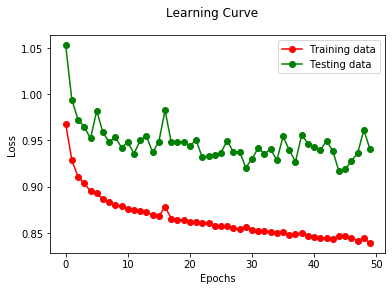

In [0]:
%run -i 'main.py' OptimizedDNN No

<br>
<font size="4"><b>  Ερώτημα 1.2 </b></font>
<br>

__Τι διαφορά(ές) έχει αυτή η αναπαράσταση με την αρχική; Τι παραπάνω πληροφορία θα μπορούσε να εξάγει; Απαντήστε συνοπτικά.__

Στο __mean pooling__ η αναπαράσταση μιας πρότασης προκύπτει ως ο __μέσος όρος των word embeddings__. Κάθε διάσταση των embeddings εκφράζει κάποια έννοια. Συνεπώς, η σημασία μιας πρότασης εξαρτάται από το βαθμό συχέτισης κάθε μίας από αυτές τις έννοιες με τις λέξεις που την απαρτίζουν. Ουσιαστικά λαμβάνοντας το μέσο όρο θεωρούμε ότι μια πρόταση εκφράζει μια έννοια αν και μόνο αν οι περισσότερες λέξεις της εκφράζουν την έννοια αυτή. Ωστόσο, το πρόβλημα είναι ότι δεν έχουν όλες οι λέξεις την ίδια "βαρύτητα" όσον αφορά την σημασία μιας πρότασης. Με άλλα λόγια υπάρχουν λέξεις με πολύ σημαντική σημασία σε κάποια διάσταση οι οποίες παίζουν καθοριστικό ρόλο στην σημασία της πρότασης, χωρίς οι υπόλοιπες λέξεις να είναι κόντα στην έννοια αυτή. Μια θετική ή μια αρνητική λέξη μπορεί να επηρεάζουν σημαντικά το νόημα μιας πρότασης . Για το λόγο αυτό μια καλή πρακτική είναι η προσθήκη (concatenation) του __max polling__ στα representations. Με αυτόν τον τρόπο δύνουμε βαρύτητα και στη σημαντικότητα της λέξης μέσα στην πρόταση.

<font size="4"><b>  Ερώτημα 2.1 </b></font>

Στο ερώτημα αυτό χρησιμοποιούμε ένα LSTM για να κωδικοποιήσουμε την πρόταση. Συγκεκριμένα χρησιμοποιούμε την τελευταία έξοδο του LSTM $h_n$ ως αναπαράσταση του κειμένου u. Στον κώδικα που παραθέτουμε στην συνέχεια (models_2_1.py) αρχικά ορίζουμε ένα LSTM με hidden size = 50 και ένα hidden layer. Σε αντίθεση με τα προηγούμενα μοντέλα που έχουμε κατασκευάσει σε αυτή την περίπτωση αφαιρούμε τον μη γραμμικό μετασχηματισμό. Όσον αφορά την συνάρτηση forward εισάγουμε τα embeddings και το lstm δίκτυο που κατασκευάσαμε και στην συνέχεια δημιουργούμε τον πίνακα real_last_timestep. Ο πίνακας αυτός χρησιμοποιείται για να μπορέσουμε να πάρουμε τις πραγματικές τιμές, όπως κάναμε και στην προπαρασκευή. Ο κώδικας λοιπόν που υλοποιήσαμε είναι ο εξής:
```python
import torch

from torch import nn
import numpy as np


class BaselineLSTM(nn.Module):
    """
    1. We embed the words in the input texts using an embedding layer
    2. We compute the min, mean, max of the word embeddings in each sample
       and use it as the feature representation of the sequence.
    4. We project with a linear layer the representation
       to the number of classes.ngth)
    """

    def __init__(self, output_size, embeddings, trainable_emb=False):
        """

        Args:
            output_size(int): the number of classes
            embeddings(bool):  the 2D matrix with the pretrained embeddings
            trainable_emb(bool): train (finetune) or freeze the weights
                the embedding layer
        """

        super(BaselineLSTM, self).__init__()
        num_emb, dim_emb = embeddings.shape
        
        # 1 - define the embedding layer
        self.embedding = nn.Embedding(num_embeddings = num_emb, embedding_dim = dim_emb) # EX4

        # 2 - initialize the weights of our Embedding layer
        # from the pretrained word embeddings
        self.embedding.weight.data.copy_(torch.from_numpy(embeddings)) # EX4

        # 3 - define if the embedding layer will be frozen or finetuned
        if not trainable_emb:
            self.embedding.weight.requires_grad = False # EX4

        # 4 - define a lstm transformation of the representations
        #hidden size = 50
        #num of hidden layers = 1
        self.lstm = nn.LSTM(dim_emb, 50, 1, batch_first = True) # Lab3.2.1

        # 5 - define the final Linear layer which maps
        # the representations to the classes
        self.linear = nn.Linear(50, output_size) # EX5

    def forward(self, x, lengths, bows):
        """
        This is the heart of the model.
        This function, defines how the data passes through the network.

        Returns: the logits for each class

        """

        # 1 - embed the words, using the embedding layer
        embeddings = self.embedding(x)  # EX6
        
        # 2 - call baseline lstm network
        base_lstm, _ = self.lstm(embeddings) # Lab3.2.1
        
        # 3 - find the real last timestep 
        real_last_timestep = [min(int(lengths[i]), base_lstm.shape[1])-1 for i in range(len(x))] # Lab3.2.1

        # 4 - construct a sentence representation out of the word embeddings
        representations = torch.zeros([len(x), embeddings.shape[2]])  # EX6     
        for i in range(len(x)):
            representations[i] = base_lstm[i, real_last_timestep[i]]

        # 5 - project the representations to classes using a linear layer
        logits = self.linear(representations.cuda()) # EX6

        return logits
```
Εκπαιδεύοντας λοιπόν το μοντέλο μας παίρνουμε τα εξής αποτελέσματα:

loading word embeddings...
Loaded word embeddings from cache.
BaselineLSTM(
  (embedding): Embedding(400002, 50)
  (lstm): LSTM(50, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=3, bias=True)
)
 [========================================] ...Epoch 1, Loss: 0.9610
 [========================================] ...Epoch 2, Loss: 0.8084
 [========================================] ...Epoch 3, Loss: 0.8759
 [========================================] ...Epoch 4, Loss: 0.8068
 [========================================] ...Epoch 5, Loss: 1.1332
 [========================================] ...Epoch 6, Loss: 0.9776
 [========================================] ...Epoch 7, Loss: 0.6707
 [========================================] ...Epoch 8, Loss: 0.8656
 [========================================] ...Epoch 9, Loss: 0.9304
 [========================================] ...Epoch 10, Loss: 0.8475
 [========================================] ...Epoch 11, Loss: 0.6174
 [===================

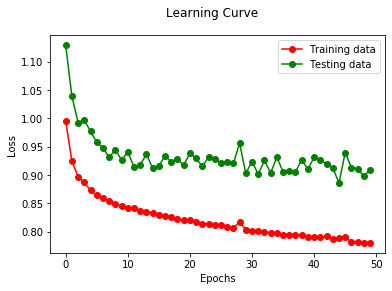

In [0]:
%run -i 'main.py' BaselineLSTM No

<br>
<font size="4"><b>  Ερώτημα 2.2 </b></font>

Το βήμα αυτό αποτελεί μια συνένωση των βημάτων 1.1 και 2.1 συνεπώς ο κώδικας μας αποτελείται από την ένωση των δύο προηγουμένων με μόνη αλλαγή τον τριπλασιασμό του input_size του linear layer. Επομένως το script models_2_2.py περιέχει τον εξής κώδικα:
```python
import torch

from torch import nn
import numpy as np


class OptimizedLSTM(nn.Module):
    """
    1. We embed the words in the input texts using an embedding layer
    2. We compute the min, mean, max of the word embeddings in each sample
       and use it as the feature representation of the sequence.
    4. We project with a linear layer the representation
       to the number of classes.ngth)
    """

    def __init__(self, output_size, embeddings, trainable_emb=False):
        """

        Args:
            output_size(int): the number of classes
            embeddings(bool):  the 2D matrix with the pretrained embeddings
            trainable_emb(bool): train (finetune) or freeze the weights
                the embedding layer
        """

        super(OptimizedLSTM, self).__init__()
        num_emb, dim_emb = embeddings.shape
        
        # 1 - define the embedding layer
        self.embedding = nn.Embedding(num_embeddings = num_emb, embedding_dim = dim_emb) # EX4

        # 2 - initialize the weights of our Embedding layer
        # from the pretrained word embeddings
        self.embedding.weight.data.copy_(torch.from_numpy(embeddings)) # EX4

        # 3 - define if the embedding layer will be frozen or finetuned
        if not trainable_emb:
            self.embedding.weight.requires_grad = False # EX4

        # 4 - define a lstm transformation of the representations
        #hidden size = 50
        #num of hidden layers = 1
        self.lstm = nn.LSTM(dim_emb, 50, 1, batch_first = True) # Lab3.2.1

        # 5 - define the final Linear layer which maps
        # the representations to the classes
        self.linear = nn.Linear(3*50, output_size) # Lab3.2.2

    def forward(self, x, lengths, bows):
        """
        This is the heart of the model.
        This function, defines how the data passes through the network.

        Returns: the logits for each class

        """

        # 1 - embed the words, using the embedding layer
        embeddings = self.embedding(x)  # EX6
        
        # 2 - call baseline lstm network
        base_lstm, _ = self.lstm(embeddings) # Lab3.2.2
        
        # 3 - find the real last timestep 
        real_last_timestep = [min(int(lengths[i]), base_lstm.shape[1])-1 for i in range(len(x))] # Lab3.2.2

        # 4 - construct a sentence representation out of the word embeddings
        representations_lstm = torch.zeros([len(x), embeddings.shape[2]])  # EX6     
        for i in range(len(x)):
            representations_lstm[i] = base_lstm[i, real_last_timestep[i]]
        
        representation_mean = torch.zeros([len(x), embeddings.shape[2]])  # Lab3.2.2
        representation_max = torch.zeros([len(x), embeddings.shape[2]])  # Lab3.2.2
        for i in range(len(x)):
            representation_mean[i] = torch.sum(embeddings[i], dim=0) / lengths[i].float() # Lab3.2.2
            representation_max[i],_ = torch.max(embeddings[i], dim=0)
        representations = torch.cat((representations_lstm, representation_mean,representation_max), 1) # Lab3.2.2
        #import pdb; pdb.set_trace()
        # 5 - project the representations to classes using a linear layer
        logits = self.linear(representations.cuda()) # EX6

        return logits
 ```
 Εκπαιδεύοντας λοιπόν το μοντέλο μας παίρνουμε τα εξής αποτελέσματα:

loading word embeddings...
Loaded word embeddings from cache.
OptimizedLSTM(
  (embedding): Embedding(400002, 50)
  (lstm): LSTM(50, 50, batch_first=True)
  (linear): Linear(in_features=150, out_features=3, bias=True)
)
 [========================================] ...Epoch 1, Loss: 0.9958
 [========================================] ...Epoch 2, Loss: 0.7948
 [========================================] ...Epoch 3, Loss: 0.9041
 [========================================] ...Epoch 4, Loss: 1.0560
 [========================================] ...Epoch 5, Loss: 0.8379
 [========================================] ...Epoch 6, Loss: 0.8967
 [========================================] ...Epoch 7, Loss: 0.8258
 [========================================] ...Epoch 8, Loss: 0.9025
 [========================================] ...Epoch 9, Loss: 0.9606
 [========================================] ...Epoch 10, Loss: 0.7797
 [========================================] ...Epoch 11, Loss: 0.6870
 [=================

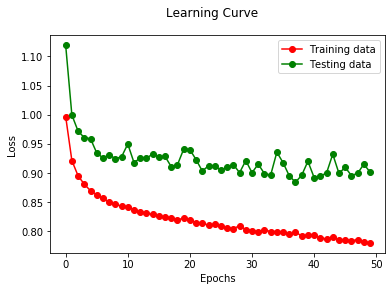

In [0]:
%run -i 'main.py' OptimizedLSTM No

<br>
<font size="4"><b>  Ερώτημα 3.1 </b></font>
<br>

Στο βήμα αυτό χρησιμοποιούμε την έτοιμη υλοποίηση του μηχανισμού __attention__ για να υπολογίσουμε την αναπαράσταση ενός κειμένου, ως το σταθμισμένο άθροισμα των word embeddings.

$$u_i=tanh(We_i+b)$$

$$a_i=\frac{exp(u_i)}{\sum_{t=1}^{N}exp(u_t)}$$

$$\sum_{i=1}^{N}a_i \boldsymbol{e_i}$$

Για την υλοποίηση του παρόντος ερωτήματος χρησιμοποιήσαμε το αρχείο SelfAttention.py που μας δώθηκε. Πλέον παίρνουμε τα representations καλώντας την SelfAttentions με ορίσματα τα embeddings και το length. Επομένως το script models_3_1.py περιέχει τον εξής κώδικα:
``` python
import torch
from SelfAttention import SelfAttention # Lab3.3.1
from torch import nn


class AttentionDNN(nn.Module):

    def __init__(self, output_size, embeddings, trainable_emb=False):
        super(AttentionDNN, self).__init__()
        num_emb, dim_emb = embeddings.shape
        
        # 1 - define the embedding layer
        self.embedding = nn.Embedding(num_embeddings = num_emb, embedding_dim = dim_emb) # EX4

        # 2 - initialize the weights of our Embedding layer
        # from the pretrained word embeddings
        self.embedding.weight.data.copy_(torch.from_numpy(embeddings)) # EX4
        # 3 - define if the embedding layer will be frozen or finetuned
        if not trainable_emb:
            self.embedding.weight.requires_grad = False # EX4

        # 4 - define the final Linear layer which maps
        # the representations to the classes
        self.linear = nn.Linear(50, output_size) # EX5
        self.attention = SelfAttention(50, batch_first = True, non_linearity = "tanh") # Lab3.3.1

    def forward(self, x, lengths, bows):

        # 1 - embed the words, using the embedding layer
        embeddings = self.embedding(x)  # EX6

        # 2 - call attention to get the representations.
        representations = self.attention(embeddings, lengths) # Lab3.3.1
        '''representations, scores = self.attention(embeddings, lengths) # Lab3.5'''
        
        # 3 - project the representations to classes using a linear layer
        logits = self.linear(representations) # EX6

        return logits
        '''return logits, scores  # Lab3.5'''
```
Εκπαιδεύοντας λοιπόν το μοντέλο μας παίρνουμε τα εξής αποτελέσματα:

loading word embeddings...
Loaded word embeddings from cache.
AttentionDNN(
  (embedding): Embedding(400002, 50)
  (linear): Linear(in_features=50, out_features=3, bias=True)
  (attention): SelfAttention(
    (softmax): Softmax(dim=-1)
    (non_linearity): Tanh()
  )
)
 [========================================] ...Epoch 1, Loss: 1.1050
 [========================================] ...Epoch 2, Loss: 1.0193
 [========================================] ...Epoch 3, Loss: 1.0399
 [========================================] ...Epoch 4, Loss: 1.0683
 [========================================] ...Epoch 5, Loss: 0.9792
 [========================================] ...Epoch 6, Loss: 1.0063
 [========================================] ...Epoch 7, Loss: 0.9139
 [========================================] ...Epoch 8, Loss: 0.9792
 [========================================] ...Epoch 9, Loss: 0.8957
 [========================================] ...Epoch 10, Loss: 0.9427
 [=====================================

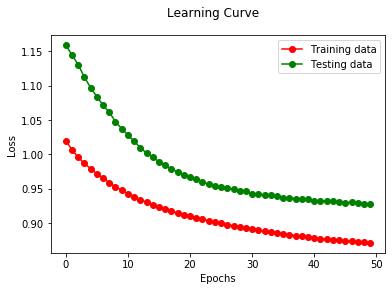

In [0]:
%run -i 'main.py' AttentionDNN No

<br>
<font size="4"><b>  Ερώτημα 3.2 </b></font>
<br>

Τώρα χρησιμοποιούμε την έτοιμη υλοποίηση του μηχανισμού __attention__ για να υπολογίσουμε την αναπαράσταση ενός κειμένου,ως το σταθμισμένο άθροισμα των εξόδων ενός LSTM.

$$u_i=tanh(Wh_i+b)$$

$$a_i=\frac{exp(u_i)}{\sum_{t=1}^{N}exp(u_t)}$$

$$\sum_{i=1}^{N}a_i h_i$$

Για την υλοποίηση του παρόντος ερωτήματος συνδυάσαμε τα ερωτήματα 2.2 και 3.1. Συγκεκριμένα πλέον ώς είσοδος στο SelfAttention layer δεν μπαίνουν τα embeddings αλλά οι έξοδοι του lstm στο οποίο έχουμε περάσει τα embeddings. Ο κώδικας που υλοποιήσαμε λοιπόν βρίσκεται στο script models_3_2.py και είναι ο εξής:
``` python
import torch
from SelfAttention import SelfAttention # Lab3.3.1
from torch import nn


class AttentionLSTM(nn.Module):

    def __init__(self, output_size, embeddings, trainable_emb=False):
        super(AttentionLSTM, self).__init__()
        num_emb, dim_emb = embeddings.shape
        
        # 1 - define the embedding layer
        self.embedding = nn.Embedding(num_embeddings = num_emb, embedding_dim = dim_emb) # EX4

        # 2 - initialize the weights of our Embedding layer
        # from the pretrained word embeddings
        self.embedding.weight.data.copy_(torch.from_numpy(embeddings)) # EX4
        # 3 - define if the embedding layer will be frozen or finetuned
        if not trainable_emb:
            self.embedding.weight.requires_grad = False # EX4

        # 4 - define a lstm transformation of the representations
        #hidden size = 50
        #num of hidden layers = 1
        self.lstm = nn.LSTM(dim_emb, 50, 1, batch_first = True) # Lab3.2.1

        # 5 - define the final Linear layer which maps
        # the representations to the classes
        self.linear = nn.Linear(50, output_size) # EX5
        self.attention = SelfAttention(50, batch_first = True, non_linearity = "tanh") # Lab3.3.1

    def forward(self, x, lengths, bows):

        # 1 - embed the words, using the embedding layer
        embeddings = self.embedding(x)  # EX6

        # 2 - call baseline lstm network
        base_lstm, _ = self.lstm(embeddings) # Lab3.2.1

        # 3 - call attention to get the representations.
        representations = self.attention(base_lstm, lengths) # Lab3.3.1
        '''representations, scores = self.attention(base_lstm, lengths) # Lab3.5'''
        
        # 4 - project the representations to classes using a linear layer
        logits = self.linear(representations) # EX6

        return logits
        '''return logits, scores # Lab3.5'''
```
Εκπαιδεύοντας λοιπόν το μοντέλο μας παίρνουμε τα εξής αποτελέσματα:

loading word embeddings...
Loaded word embeddings from cache.
AttentionLSTM(
  (embedding): Embedding(400002, 50)
  (lstm): LSTM(50, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=3, bias=True)
  (attention): SelfAttention(
    (softmax): Softmax(dim=-1)
    (non_linearity): Tanh()
  )
)
 [========================================] ...Epoch 1, Loss: 1.0454
 [========================================] ...Epoch 2, Loss: 0.7759
 [========================================] ...Epoch 3, Loss: 0.8712
 [========================================] ...Epoch 4, Loss: 0.9433
 [========================================] ...Epoch 5, Loss: 0.8973
 [========================================] ...Epoch 6, Loss: 0.9694
 [========================================] ...Epoch 7, Loss: 0.9800
 [========================================] ...Epoch 8, Loss: 0.8138
 [========================================] ...Epoch 9, Loss: 0.8426
 [========================================] ...Epoch 10, Loss: 0.94

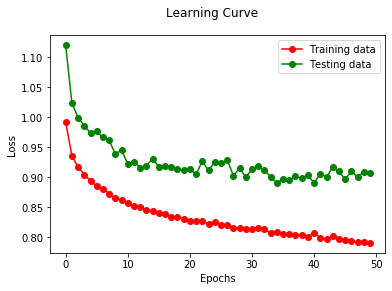

In [0]:
%run -i 'main.py' AttentionLSTM No

<br>
<font size="4"><b>  Ερώτημα 4.1 </b></font>
<br>

Το μοντέλο αυτό ουσιαστικά είναι ίδιο με το μοντέλο OptimizedLSTM που ορίσαμε στο ερώτημα 2.2 (models_2_2.py) με μοναδική διαφορά ότι στην αρχικοποίηση του μοντέλου ορίζουμε το LSTM ως bidirectional
καθώς επίσης το τελευταίο linear layer θα παίρνει τώρα αναπαραστάσεις μεγέθους  $\small 4 \cdot \text{hidden size} $:
Ο κώδικας του script models_4_1.py είναι ο ακόλουθος:
``` python
import torch

from torch import nn
import numpy as np
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence


class OptimizedBiLSTM(nn.Module):
    """
    1. We embed the words in the input texts using an embedding layer
    2. We compute the min, mean, max of the word embeddings in each sample
       and use it as the feature representation of the sequence.
    4. We project with a linear layer the representation
       to the number of classes.ngth)
    """

    def __init__(self, output_size, embeddings, trainable_emb=False):
        """

        Args:
            output_size(int): the number of classes
            embeddings(bool):  the 2D matrix with the pretrained embeddings
            trainable_emb(bool): train (finetune) or freeze the weights
                the embedding layer
        """

        super(OptimizedBiLSTM, self).__init__()
        num_emb, dim_emb = embeddings.shape
        
        # 1 - define the embedding layer
        self.embedding = nn.Embedding(num_embeddings = num_emb, embedding_dim = dim_emb) # EX4

        # 2 - initialize the weights of our Embedding layer
        # from the pretrained word embeddings
        self.embedding.weight.data.copy_(torch.from_numpy(embeddings)) # EX4

        # 3 - define if the embedding layer will be frozen or finetuned
        if not trainable_emb:
            self.embedding.weight.requires_grad = False # EX4

        # 4 - define a lstm transformation of the representations
        #hidden size = 50
        #num of hidden layers = 1
        self.Bi_lstm = nn.LSTM(dim_emb, 50, 1, batch_first = True, bidirectional = True) # Lab3.2.1

        # 5 - define the final Linear layer which maps
        # the representations to the classes
        self.linear = nn.Linear(4*50, output_size) # Lab3.2.2

    def forward(self, x, lengths, bows):
        """
        This is the heart of the model.
        This function, defines how the data passes through the network.

        Returns: the logits for each class

        """

        # 1 - embed the words, using the embedding layer
        embeddings = self.embedding(x)  # EX6
        
        # 2 - call baseline lstm network
        base_Bilstm, _ = self.Bi_lstm(embeddings) # Lab3.2.2
        
        # 3 - find the real last timestep 
        real_last_timestep = [min(int(lengths[i]), base_Bilstm.shape[1])-1 for i in range(len(x))] # Lab3.2.2
        
        # 4 - Limit of forward and backward
        limit = int(base_Bilstm.shape[2]/2)

        # 5 - construct a sentence representation out of the word embeddings
        representations_Bilstm_fw = torch.zeros([len(x), embeddings.shape[2]])  # Lab3.4.1     
        representations_Bilstm_bw = torch.zeros([len(x), embeddings.shape[2]])  # Lab3.4.1

        for i in range(len(x)):
            representations_Bilstm_fw[i] = base_Bilstm[i, real_last_timestep[i], :limit]  # Lab3.4.1
            representations_Bilstm_bw[i] = base_Bilstm[i, real_last_timestep[i], limit:]  # Lab3.4.1
        representation_mean = torch.zeros([len(x), embeddings.shape[2]])  # Lab3.2.2
        representation_max = torch.zeros([len(x), embeddings.shape[2]])  # Lab3.2.2
        for i in range(len(x)):
            representation_mean[i] = torch.sum(embeddings[i], dim=0) / lengths[i].float() # Lab3.2.2
            representation_max[i],_ = torch.max(embeddings[i], dim=0)
        
        representations = torch.cat((representations_Bilstm_fw, representations_Bilstm_bw, representation_mean,representation_max), 1) # Lab3.4.1
        # 6 - project the representations to classes using a linear layer
        logits = self.linear(representations.cuda()) # EX6

        return logits
```
Εκπαιδεύοντας λοιπόν το μοντέλο μας παίρνουμε τα εξής αποτελέσματα:

loading word embeddings...
Loaded word embeddings from cache.
OptimizedBiLSTM(
  (embedding): Embedding(400002, 50)
  (Bi_lstm): LSTM(50, 50, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=200, out_features=3, bias=True)
)
 [========================================] ...Epoch 1, Loss: 0.9383
 [========================================] ...Epoch 2, Loss: 0.9191
 [========================================] ...Epoch 3, Loss: 0.8885
 [========================================] ...Epoch 4, Loss: 0.9638
 [========================================] ...Epoch 5, Loss: 0.8517
 [========================================] ...Epoch 6, Loss: 0.8742
 [========================================] ...Epoch 7, Loss: 0.8449
 [========================================] ...Epoch 8, Loss: 0.9816
 [========================================] ...Epoch 9, Loss: 0.8284
 [========================================] ...Epoch 10, Loss: 0.8653
 [========================================] ...Epoch 11, Loss: 0

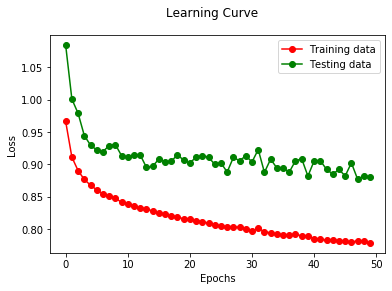

In [0]:
%run -i 'main.py' OptimizedBiLSTM No

<br>
<font size="4"><b>  Ερώτημα 4.2 </b></font>
<br>

Το μοντέλο αυτό ουσιαστικά είναι ίδιο με το μοντέλο AttentionLSTM που ορίσαμε στο ερώτημα 3.2 (models_3_2.py) με τη διαφορά ότι στην αρχικοποίηση του μοντέλου ορίζουμε το LSTM ως bidirectional.Επίσης το τελευταίο linear layer θα παίρνει τώρα αναπαραστάσεις μεγέθους  $\small 2 \cdot \text{hidden size} $
ενώ διπλασιάζεται και η είσοδος στο Attention Layer.
``` python 
import torch
from SelfAttention import SelfAttention # Lab3.3.1
from torch import nn


class AttentionBiLSTM(nn.Module):

    def __init__(self, output_size, embeddings, trainable_emb=False):
        super(AttentionBiLSTM, self).__init__()
        num_emb, dim_emb = embeddings.shape
        
        # 1 - define the embedding layer
        self.embedding = nn.Embedding(num_embeddings = num_emb, embedding_dim = dim_emb) # EX4

        # 2 - initialize the weights of our Embedding layer
        # from the pretrained word embeddings
        self.embedding.weight.data.copy_(torch.from_numpy(embeddings)) # EX4
        # 3 - define if the embedding layer will be frozen or finetuned
        if not trainable_emb:
            self.embedding.weight.requires_grad = False # EX4

        # 4 - define a lstm transformation of the representations
        #hidden size = 50
        #num of hidden layers = 1
        self.Bi_lstm = nn.LSTM(dim_emb, 50, 1, batch_first = True, bidirectional = True) # Lab3.4.2

        # 5 - define the final Linear layer which maps
        # the representations to the classes
        self.linear = nn.Linear(2*50, output_size) # EX5
        self.attention = SelfAttention(2*50, batch_first = True, non_linearity = "tanh") # Lab3.4.2

    def forward(self, x, lengths, bows):

        # 1 - embed the words, using the embedding layer
        embeddings = self.embedding(x)  # EX6

        # 2 - call baseline lstm network
        base_Bilstm, _ = self.Bi_lstm(embeddings) # Lab3.4.2

        # 3 - call attention to get the representations.
        representations = self.attention(base_Bilstm, lengths) # Lab3.4.2
        '''representations, scores = self.attention(base_Bilstm, lengths) # Lab3.5'''
        
        # 4 - project the representations to classes using a linear layer
        logits = self.linear(representations) # EX6

        return logits, scores
        '''return logits, scores # Lab3.5'''
```
Εκπαιδεύοντας λοιπόν το μοντέλο μας παίρνουμε τα εξής αποτελέσματα:

loading word embeddings...
Loaded word embeddings from cache.
AttentionBiLSTM(
  (embedding): Embedding(400002, 50)
  (Bi_lstm): LSTM(50, 50, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=100, out_features=3, bias=True)
  (attention): SelfAttention(
    (softmax): Softmax(dim=-1)
    (non_linearity): Tanh()
  )
)
 [========================================] ...Epoch 1, Loss: 0.9658
 [========================================] ...Epoch 2, Loss: 1.0258
 [========================================] ...Epoch 3, Loss: 0.9165
 [========================================] ...Epoch 4, Loss: 0.9958
 [========================================] ...Epoch 5, Loss: 0.8291
 [========================================] ...Epoch 6, Loss: 0.9344
 [========================================] ...Epoch 7, Loss: 0.8024
 [========================================] ...Epoch 8, Loss: 0.6681
 [========================================] ...Epoch 9, Loss: 0.7331
 [=======================================

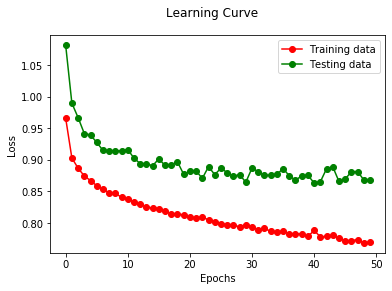

In [0]:
%run -i 'main.py' AttentionBiLSTM No

Για μια ενδεικτική __σύγκριση όλων των προηγούμενων αποτελεσμάτων__, παραθέτουμε παρακάτω ένα πίνακα που δείχνει το __accuracy__ πάνω στο train και στο test set όλων των μοντέλων που κατασκευάσαμε:

|                   |             |            |
|-------------------|-------------|------------|
|                   |**Train Set**|**Test Set**|
| **OptimizedDNN**  | 0.60        | 0.56       |
| **AttentionDNN**  | 0.59        | 0.57       |
| **BaselineLSTM**  | 0.64        | 0.59       |
|**OptimizedLSTM**  | 0.64        | 0.59       |
|**AttentionLSTM**  | 0.63        | 0.60       |
|**OptimizedBiLSTM**| 0.64        | 0.60       |
|**AttentionBiLSTM**| 0.65        | 0.61       |

<br>
<font size="4"><b>  Ερώτημα 5.1 </b></font>

Συγκρίνοντας τα validation losses όλων των προηγούμενων μοντέλων που εκπαιδεύσαμε βλέπουμε ότι αυτό με το μικρότερο validation loss είναι το AttentionBiLSTM με validation loss = 0.86827135. Συνεπώς καλούμαστε να αποθηκεύσουμε σε ένα checkpoint στο δίσκο το μοντέλο αυτό. Για να το επιτύχουμε αυτό προσθέτουμε στο script main.py την εξής εντολή:
```python
torch.save(model, model_name+'.pt')
```
Στη συνέχεια χρησιμοποιώντας το αποθηκευμένο checkpoint αποθηκεύουμε τις προβλέψεις του δικτύου στο validation set. Συγκεκριμένα δημιουργούμε ένα αρχείο που περιέχει τα περιεχόμενα της μεταβλητής y_test_pred. Αυτό το επιτυγχάνουμε με τις επόμενες γραμμές κώδικα:
```python
with open(model_name+'_predictions.txt', 'w') as f:
  for i in y_test_pred:
    f.write(str(int(i)) + '\n')
```


In [0]:
%run -i 'main.py' AttentionBiLSTM No

<br>
<font size="4"><b>  Ερώτημα 5.2 </b></font>

Στο ερώτημα αυτό χρησιμοποιούμε το NeAt-vision για να οπτικοποιήσουμε τα βάρη των κατανομών του attention. Για να το επιτύχουμε αυτό πρέπει σύμφωνα με το documentation του NeAt-vision να δημιουργήσουμε δύο .json αρχεία. Το πρώτο (predictions) από αυτά θα πρέπει να έχει την μορφή:
```python
{
    "text": [],       \\ list of strings - the tokens (words, chars) in the text. (required)
    "label": 0,       \\ integer - the class label. (required)
    "prediction": 0,  \\ integer - the predicted label. (required)
    "posterior": [],  \\ list of floats - the posterior probabilities. (optional)
    "attention": [],  \\ list of floats - the attention weigths. (required)
    "id": "sample_99" \\ string - a unique id assigned to each sample. (required)
 }
 ```
και το δεύτερο (labels) θα πρέπει να έχει την μορφή παραπλήσια με την επόμενη:
```python
{
  "0": {
    "name": "❤",
    "desc": "_red_heart_"
  },
  "1": {
    "name": "😍",
    "desc": "_smiling_face_with_hearteyes_"
  },
  "2": {
    "name": "😂",
    "desc": "_face_with_tears_of_joy_"
}
```
Για να μπορέσουμε να έχουμε όλες τις μεταβλητές αυτές που χρειαζόμασταν στην main έπρεπε να τροποιήσουμε τα κάποια scripts. Τις αλλαγές που θα περιγράψουμε στην συνέχεια τις βάζουμε σε σχόλια μετά την διεκπαιρέωση του ερωτήματος ώστε να υπάρχει συμβατότητα με τα προηγούμενα ερωτήματα που είναι σε πλήθος περισσότερα. Συγκεκριμένα οι αλλαγές που κάναμε ήταν:
* ___SelfAttention.py___ : Επιστρέφει την μεταβλητή scores.
``` python
return representations, scores
```
* ____models_4_2.py, models_3_2.py, models_3_1.py___ : Η συνάρτηση forward πλέον περιέχει τα scores τα οποία επιστρέφει.
```python
def forward(self, x, lengths, bows):

        # 1 - embed the words, using the embedding layer
        embeddings = self.embedding(x)  # EX6

        # 2 - call attention to get the representations.
        representations, scores = self.attention(embeddings, lengths) # Lab3.3.1
        
        # 3 - project the representations to classes using a linear layer
        logits = self.linear(representations) # EX6

        return logits, scores
```
* ___training.py___ : Πλέον περιέχει τα scores τα οποία βάζει σε μια λίστα και τα επιστρέφει. Επίσης οι a posteriori πιθανότητες που ήδη υπολογίζονταν τώρα μπαίνουν και αυτές σε μια λίστα και επιστρέφονται στην main.
```python
def eval_dataset(dataloader, model, loss_function):
    # IMPORTANT: switch to eval mode
    # disable regularization layers, such as Dropout

    model.eval()
    running_loss = 0.0

    y_pred = []  # the predicted labels
    y = []  # the gold labels
    y_post = [] # the posteriors
    y_scores = [] # the scores

    # obtain the model's device ID
    device = next(model.parameters()).device

    # IMPORTANT: in evaluation mode, we don't want to keep the gradients
    # so we do everything under torch.no_grad()
    with torch.no_grad():
        for index, batch in enumerate(dataloader, 1):
            # get the inputs (batch)
            inputs, labels, lengths, bows = batch

            # Step 1 - move the batch tensors to the right device
            inputs = inputs.to(device) # EX9
            labels = labels.to(device) # EX9
            lengths = lengths.to(device) # EX9
            bows = bows.to(device)

            # Step 2 - forward pass: y' = model(x)
            ypred, scores = model(inputs, lengths, bows) # EX9
            
            # Step 3 - compute loss.
            # We compute the loss only for inspection (compare train/test loss)
            # because we do not actually backpropagate in test time
            if str(loss_function) == "BCEWithLogitsLoss()":  # EX9
               opt_labels = torch.nn.functional.one_hot(labels, 2).float()  # EX9
            else:
               opt_labels = labels  # EX9
            loss = loss_function(ypred, opt_labels) # EX9

            # Step 4 - make predictions (class = argmax of posteriors)
            arg_max_post = torch.argmax(ypred, 1) # EX9

            # Step 5 - collect the predictions, gold labels and batch loss
            y_pred.append(arg_max_post.cpu().numpy()) # EX9
            y.append(labels.cpu().numpy()) # EX9
            
            y_post.append(ypred.cpu().numpy()) # Lab3.5.2
            y_scores.append(scores.cpu().numpy()) # Lab3.5.2

            running_loss += loss.data.item()

    return running_loss / index, (y_pred, y), y_post, y_scores
```
* ___main.py___ : Δημιουργούμε ένα αρχείο .json και προσθέτουμε τις απαραίτητες μεταβλητές στην απαραίτητη δομή που προαναφέραμε. Στο σημείο αυτό αναφέρουμε ότι κάνουμε tokenize το κείμενο με τον tokenizer που έχουμε χρησιμοποιήσει και στα προηγούμενα ερωτήματα.
```python
tokenizer = TweetTokenizer()
    token_text = [tokenizer.tokenize(example) for example in X_test]
           
    with open(model_name+'.json', 'w') as f:
        all_data = []
        for i in range(len(test_set)):
            jsn_d ={}
            jsn_d['text'] = token_text[i]
            jsn_d['label'] = int(test_set[i][1])
            jsn_d['prediction'] = int(y_test_pred[i])
            jsn_d['posterior'] = y_test_post[i].tolist()
            jsn_d['attention'] = y_test_scores[i].tolist()
            jsn_d['id'] = i
            all_data.append(jsn_d)
        json.dump(all_data, f)
```

Τα αρχεία που δημιουργήθηκαν στα βήματα είναι:
1. ___AttentionBiLSTM.pt___ (checkpoint)
2. ___AttentionBiLSTM_predictions.txt___ (predictions)
3. ___AttentionBiLSTM.json___ (predictions json file)
4. ___labels.json___ (labels json file)

Και περιέχονται στον φάκελο με τα παραδοτέα.

Ανεβάζοντας τα αρχεία μας στο https://cbaziotis.github.io/neat-vision/ δημιουργούμε τις οπτικοποιήσεις που ζητούνται. Μερικά χαρακτηριστικά παραδείγματα είναι τα εξής:

* Σωστή αρνητική πρόβλεψη

<a href="https://ibb.co/9bmDj52"><img src="https://i.ibb.co/3p53HZW/Screenshot-from-2020-01-29-18-37-09.png" alt="Screenshot-from-2020-01-29-18-37-09" border="0"></a><br /><br>

* Σωστή θετική πρόβλεψη

<a href="https://ibb.co/tXpVx1v"><img src="https://i.ibb.co/sH986XN/Screenshot-from-2020-01-29-18-42-20.png" alt="Screenshot-from-2020-01-29-18-42-20" border="0"></a><br /><br>

* Σωστή ουδέτερη πρόβλεψη

<a href="https://ibb.co/1qrGytP"><img src="https://i.ibb.co/Wykv84M/Screenshot-from-2020-01-29-18-58-06.png" alt="Screenshot-from-2020-01-29-18-58-06" border="0"></a><br /><br>

* Θετικό ενώ είναι αρνητικό

<a href="https://ibb.co/D81S8Tg"><img src="https://i.ibb.co/P9rf90z/Screenshot-from-2020-01-29-18-28-10.png" alt="Screenshot-from-2020-01-29-18-28-10" border="0"></a><br /><a target='_blank'></a><br />

* Αρνητικό ενώ είναι θετικό

<a href="https://ibb.co/gMLsCbQ"><img src="https://i.ibb.co/1ftHxYB/Screenshot-from-2020-01-29-19-05-52.png" alt="Screenshot-from-2020-01-29-19-05-52" border="0"></a><br />


<br>
<font size="4"><b>  Ερώτημα 5.3 </b></font>

Ακολουθήσαμε τα ερωτήματα 5.1 και 5.2 για τα μοντέλα AttentionDNN, AttentionLSTM. Των οποίων τα αρχεία οπτικοποιήσαμε και παρουσιάζουμε στην συνέχεια τρία ενδιαφέρνοντα αποτελέσματα. Τα αρχεία που προέκυψαν επισυνάπτονται και αυτά στον φάκελο με τα παραδοτέα. Επισημαίνουμε ότι στις επόμενες εικόνες το πρώτο κομμάτι της καθεμίας αφορά το AttentionBiLSTM, το δεύτερο αφρορά το Attention DNN και το τρίτο το AttentionLSTM.


In [0]:
%run -i 'main.py' AttentionDNN No
%run -i 'main.py' AttentionLSTM No

<a href="https://ibb.co/xmfjt99"><img src="https://i.ibb.co/VHQScnn/imgonline-com-ua-twotoone-a1-Ugh-IJUSym61k.jpg" alt="imgonline-com-ua-twotoone-a1-Ugh-IJUSym61k" border="0"></a><br />

Παρατηρούμε ότι το μόνο που κάνει σωστή πρόβλεψη (positive)είναι το BiLSTM καθώς εξετάζει την ακολουθία και αριστερόστροφα και δεξιόστροφα με αποτέλεσμα να δίνει τα σωστότερα βάρη στις λέξεις. Αντίθετα το απλό νευρωνικό που εξετάζει τις λέξεις ξεχωριστά κάνει εντελώς λανθασμένη πρόβλεψη (negative). Το απλό lstm που εξετάζει την ακολουθία μόνο προς μία κατεύθυνση δίνει μερικώς σωστά βάρη στις λέξεις με αποτέλεσμα να κρίνει το tweet ως neutral.
<br><br>

<a href="https://ibb.co/th7GQzd"><img src="https://i.ibb.co/z5yMQFk/imgonline-com-ua-twotoone-LWBHY3n-C0c-Kee.jpg" alt="imgonline-com-ua-twotoone-LWBHY3n-C0c-Kee" border="0"></a><br />
Η συμπεριφορά που παρατηρούμε είναι παραπλήσια με πρίν με μόνη διαφορά στο απλό νευρωνικό όπου τα βάρη των λέξεων είναι κάπως σταθμισμένα με αποτελέσμα το tweet να αναγνωρίζεται ως neutral.
<br><br>

<a href="https://ibb.co/ng5nz0K"><img src="https://i.ibb.co/YRqypWV/imgonline-com-ua-twotoone-t-OEtr-FLi-IC.jpg" alt="imgonline-com-ua-twotoone-t-OEtr-FLi-IC" border="0"></a><br />
Οι παρατηρήσεις μας είναι αντίστοιχες με αυτές των δύο προηγούμενων παραδειγμάτων. Το ενδιαφέρον που παρατηρούμε σε αυτό το παράδειγμα είναι ότι το lstm δίνει σχεδόν μηδενικά βάρη σε λέξεις που και το απλό dnn δίνει μηδενικά βάρη οπότε η πρόβλεψη τους είναι σχεδόν ολόιδια. Όσον αφορά το BiLSTM, όπως και στις προηγούμενες δύο περιπτώσεις δίνει σωστή πρόβλεψη.


<br>
<font size="4"><b>  Ερώτημα 6.1 </b></font>
<br>

Στο ερώτημα αυτό χρησιμοποιήσαμε τα Bag-of-Words(BoW) χαρακτηριστικά σε συνδυασμό με το μοντέλο που αναπτύξαμε στο ερώτημα 2.1 (τυχαία επιλογή). Για τον υπολογισμό των BoW χαρακτηριστικών χρησιμοποιήσαμε τον TfidfVectorizer. Το βήμα αυτό χρειάστηκε ειδική μεταχείριση καθώς οι πυκνοί πίνακες γέμιζαν την ram. Τα βήματα που ακολουθήσαμε ήταν τα εξής:
1. Είσοδος στην main αν θα χρησιμοποιήσουμε τα bow. Αν αυτή είναι Yes τότε συνεχίζουμε. Οι υπόλοιπες αλλαγές έγιναν στο scrip dataloading.py.
2. Εφαρμόζουμε τον TfidfVectorizer στο corpus μας και προκύπτει ένας αραιός πίνακας όπου κάθε γραμμή του έχει στοιχεία όσες οι μοναδικές λέξεις της αντίστοιχης πρότασης.
3. Στη συνάρτηση getitem χρησιμοποιώντας την έτοιμη συνάρτηση vectorizer.vocabulary_[word] μπορούσαμε να έχουμε την θέση της λέξης στον αραιό πίνακα και συνεπώς να πάρουμε την Tfidf αναπαράσταση της.
4. Δημιιουργήσαμε λοιπόν τον πίνακα bowar αντίστοιχο του exmaple που δημιουργούσαμε έως τώρα. Ο πίνακας αυτός περιέχει πλέον τα βάρη και τον επιστρέφουμε στην main ως το 4ο object του train και του test set.
5. Δημιουργούμε το μοντέλο BOW_LSTM. Πλέον η forward δέχεται ως όρισμα και τα βάρη των αντίστοιχων embeddings. Επιλέγουμε λοιπόν τα βάρη αυτά να τα πολλαπλασιάσουμε με τα embeddings και το γινόμενο αυτό να είναι τα νέα embeddings που θα δωθούν ως είσοδος στο νευρωνικό μας. Η ιδέα αυτή πάρθηκε από το paper https://www.aclweb.org/anthology/S17-2100.pdf.

Το script dataloading.py περιέχει τον εξής κώδικα:
``` python
from torch.utils.data import Dataset
from tqdm import tqdm
import numpy as np
from nltk.tokenize import TweetTokenizer
import string
from nltk.corpus import stopwords
from numpy import mean, std
from math import ceil
from sklearn.feature_extraction.text import TfidfVectorizer

#DATASET = "Semeval2017A"  # options: "MR", "Semeval2017A"

class SentenceDataset(Dataset):
    """
    Our custom PyTorch Dataset, for preparing strings of text (sentences)
    What we have to do is to implement the 2 abstract methods:

        - __len__(self): in order to let the DataLoader know the size
            of our dataset and to perform batching, shuffling and so on...

        - __getitem__(self, index): we have to return the properly
            processed data-item from our dataset with a given index
    """
    

    def __init__(self, X, y, word2idx,DATASET, bow):
        """
        In the initialization of the dataset we will have to assign the
        input values to the corresponding class attributes
        and preprocess the text samples

        -Store all meaningful arguments to the constructor here for debugging
         and for usage in other methods
        -Do most of the heavy-lifting like preprocessing the dataset here


        Args:
            X (list): List of training samples
            y (list): List of training labels
            word2idx (dict): a dictionary which maps words to indexes
        """
        # EX2
        self.bow = bow
        if DATASET == "Semeval2017A":
            tweetToken = TweetTokenizer()
            self.data = [tweetToken.tokenize(example) for example in X]

            if bow == "Yes": 
               self.vectorizer = TfidfVectorizer(tokenizer=lambda i:i, lowercase=False)
               self.corpus_tf_idf = self.vectorizer.fit_transform(self.data)
        elif DATASET == "MR":
            self.data = []
            for sample in X:
                new_string = sample.strip()		# remove all the leading and trailing spaces from a string
                new_string = new_string.lower()		# lowercase string
                for punctuation in string.punctuation:	# remove punctuation
                    new_string = new_string.replace(punctuation,' ')
                new_string = "".join((char for char in new_string if char.isalpha() or char.isspace()))		# Keeps only letters and spaces
                new_string = new_string.replace("\n", " ")		# replace newlines with spaces
                new_string = new_string.split()			# use split without parameter to split the words indipendently of spaces number
                self.data.append(new_string)
        else:
            raise ValueError("Invalid dataset")
        self.labels = y
        self.word2idx = word2idx

        # raise NotImplementedError
        
        #EX3
        init_len = [len(sample) for sample in self.data]
        init_len_mean = np.mean(init_len)
        init_len_std = np.std(init_len)
        upper_bound = init_len_mean+2*init_len_std
        lower_bound = init_len_mean-2*init_len_std
        without_outl_len = [l for l in init_len if l >= lower_bound and l <= upper_bound]
        without_outl_len = sorted(without_outl_len)
        self.best_len = without_outl_len[ceil(0.8*len(without_outl_len))]

    def __len__(self):
        """
        Must return the length of the dataset, so the dataloader can know
        how to split it into batches
        Returns:
            (int): the length of the dataset
        """

        return len(self.data)
    

    def __getitem__(self, index):
        """
        Returns the _transformed_ item from the dataset
        Args:
            index (int):
        Returns:
            (tuple):
                * example (ndarray): vector representation of a training example
                * label (int): the class label
                * length (int): the length (tokens) of the sentence
        Examples:
            For an `index` where:
            ::
                self.data[index] = ['this', 'is', 'really', 'simple']
                self.target[index] = "neutral"
            the function will have to return something like:
            ::
                example = [  533  3908  1387   649   0     0     0     0]
                label = 1
                length = 4
        """
        # EX3
        i = 0
        example = np.zeros(self.best_len, dtype = np.int64)
        bowar = []
        for word in self.data[index]:
            if i < self.best_len:
                if self.bow == "Yes":
                   c = self.vectorizer.vocabulary_[word]
                   bowar.append(self.corpus_tf_idf[index].todense()[:,c].item(0))
                if word in self.word2idx.keys():
                   example[i] = (self.word2idx[word])
                else:
                   example[i] = (self.word2idx['<unk>'])
                i += 1
        while(len(bowar)<self.best_len): bowar.append(0)
        bowar = np.asarray(bowar)
        length = len(self.data[index])
        label = self.labels[index]

        return example, label, length, bowar
```
Και το models_6_1.py περιέχει τον εξής κώδικα:
``` python
import torch

from torch import nn
import numpy as np


class BOW_LSTM(nn.Module):
    """
    1. We embed the words in the input texts using an embedding layer
    2. We compute the min, mean, max of the word embeddings in each sample
       and use it as the feature representation of the sequence.
    4. We project with a linear layer the representation
       to the number of classes.ngth)
    """

    def __init__(self, output_size, embeddings, trainable_emb=False):
        """

        Args:
            output_size(int): the number of classes
            embeddings(bool):  the 2D matrix with the pretrained embeddings
            trainable_emb(bool): train (finetune) or freeze the weights
                the embedding layer
        """

        super(BOW_LSTM, self).__init__()
        num_emb, dim_emb = embeddings.shape
        
        # 1 - define the embedding layer
        self.embedding = nn.Embedding(num_embeddings = num_emb, embedding_dim = dim_emb) # EX4

        # 2 - initialize the weights of our Embedding layer
        # from the pretrained word embeddings
        self.embedding.weight.data.copy_(torch.from_numpy(embeddings)) # EX4

        # 3 - define if the embedding layer will be frozen or finetuned
        if not trainable_emb:
            self.embedding.weight.requires_grad = False # EX4

        # 4 - define a lstm transformation of the representations
        #hidden size = 50
        #num of hidden layers = 1
        self.lstm = nn.LSTM(dim_emb, 50, 1, batch_first = True) # Lab3.2.1

        # 5 - define the final Linear layer which maps
        # the representations to the classes
        self.linear = nn.Linear(50, output_size) # EX5

    def forward(self, x, lengths, bows):
        """
        This is the heart of the model.
        This function, defines how the data passes through the network.

        Returns: the logits for each class

        """

        # 1 - embed the words, using the embedding layer
        embeddings = self.embedding(x)  # EX6
        
        new_embeddings = torch.zeros([embeddings.shape[0], embeddings.shape[1], embeddings.shape[2]])
        for i in range(embeddings.shape[0]):
            for j in range(embeddings.shape[1]):
                new_embeddings[i][j][:] = bows[i][j]*embeddings[i][j][:]
        
        # 2 - call baseline lstm network
        base_lstm, _ = self.lstm(new_embeddings.cuda()) # Lab3.2.1
        
        # 3 - find the real last timestep 
        real_last_timestep = [min(int(lengths[i]), base_lstm.shape[1])-1 for i in range(len(x))] # Lab3.2.1

        # 4 - construct a sentence representation out of the word embeddings
        representations = torch.zeros([len(x), embeddings.shape[2]])  # EX6     
        for i in range(len(x)):
            representations[i] = base_lstm[i, real_last_timestep[i]]

        # 5 - project the representations to classes using a linear layer
        logits = self.linear(representations.cuda()) # EX6

        return logits
```
Στο σημείο αυτό αναφέρουμε ότι η εκπαίδευση του μοντέλου αυτού κατέστη ιδιαίτερα χρονοβόρα καθώς δεν βρέθηκε τρόπος να μεταφερθεί η πράξη του πολλαπλασιασμού των πινάκων σε gpu. Συνεπώς η εκπαίδευση εκτελέστηκε τοπικά στον υπολογιστή μόνο μία φορά, τα αποτελέσματα της οποίας επισυνάπτουμε σε εικόνες στην συνέχεια. Για λόγους συμβατότητας με τα προηγούμενα ερωτήματα επιλέξαμε να το εκπαιδεύσουμε με μόνο 10 εποχές και στο παρόν notebook.

Εκπαιδεύοντας λοιπόν το μοντέλο μας παίρνουμε τα εξής αποτελέσματα:

loading word embeddings...
Loaded word embeddings from cache.
BOW_LSTM(
  (embedding): Embedding(400002, 50)
  (lstm): LSTM(50, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=3, bias=True)
)
 [========================================] ...Epoch 1, Loss: 0.9467
 [========================================] ...Epoch 2, Loss: 1.0050
 [========================================] ...Epoch 3, Loss: 0.9116
 [========================================] ...Epoch 4, Loss: 0.8704
 [========================================] ...Epoch 5, Loss: 0.8606
 [========================================] ...Epoch 6, Loss: 0.8119
 [========================================] ...Epoch 7, Loss: 0.8590
 [========================================] ...Epoch 8, Loss: 0.8246
 [========================================] ...Epoch 9, Loss: 0.8874
 [========================================] ...Epoch 10, Loss: 0.9788
----------------- Results for  Semeval2017A  dataset -----------------
The trainning loss is:  

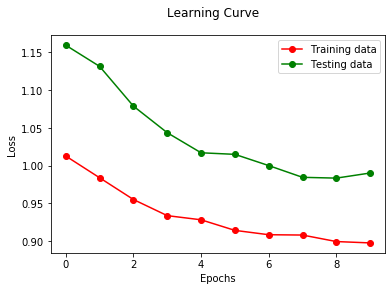

In [0]:
%run -i 'main.py' BOW_LSTM Yes

<a href="https://ibb.co/zWM13CT"><img src="https://i.ibb.co/dsTSNXw/Screenshot-from-2020-01-28-23-22-07.png" alt="Screenshot-from-2020-01-28-23-22-07" border="0"></a>
<a href="https://ibb.co/TRSV4Gq"><img src="https://i.ibb.co/4MG68Lg/Screenshot-from-2020-01-28-23-21-28.png" alt="Screenshot-from-2020-01-28-23-21-28" border="0"></a>
<a href="https://ibb.co/nnTHgpB"><img src="https://i.ibb.co/BrmXzkG/Screenshot-from-2020-01-28-23-20-25.png" alt="Screenshot-from-2020-01-28-23-20-25" border="0"></a>

Και προέκυψε η εξής γραφική απεικόνιση:

<a href="https://ibb.co/YLYR3CG"><img src="https://i.ibb.co/Js0BK1P/Figure-1.png" alt="Figure-1" border="0"></a>

<font size="4"><b>  Ερώτημα 6.2 </b></font>
<br>

__Σε ποιες περιπτώσεις θα μπορούσαν τα BoW χαρακτηριστικά να οδηγήσουν σε καλύτερα αποτελέσματα σε σχέση με αναπαραστάσεις όπως ο μέσος όρος των word embeddings?__

Η μέθοδος Bag of Words δημιουργεί ορισμένους περιορισμούς, όπως είναι η αραιή αναπαράσταση πινάκων (sparse tables) και η μεγάλη διάσταση χαρακτηριστικών (large dimension features). Από την άλλη, τα word embendings δίνουν εν γένει πυκνές (dense) αναπαραστάσεις και μικρότερες διαστάσεις διανυσμάτων, με αποτέλεσμα να αποτελούν ένα από τα πιο κατάλληλα εργαλεία στον τομέα της επεξεργασίας φωνής και φυσικής γλώσσας. Ωστόσο, τα word embendings λειτουργούν πολύ καλά όταν εκπαιδεύονται πάνω σε μεγάλο πλήθος δεδομένων, δηλαδή όταν το dataset είναι μεγάλο. Τότε μπορούν να προσομοιώσουν πολύ αποτελεσματικά την σημασιολογική απόσταση των λέξεων διατηρώντας διανύσματα μικρών διαστάσεων. Το πρόβλημα εμφανίζεται __όταν το dataset είναι μικρό και το context είναι domain specific__. Στην περίπτωση αυτή, το πλήθος των δεδομένων δεν είναι αρκετό για να γίνει το feature extraction σωστά και τα word embendings αποτυνχάνουν σε σχέση με το Βag of Words που δεν επηρεάζεται. Με άλλα λόγια, όταν το dataset είναι μικρό τα word embeddings θα είναι προεκπαιδευμένα σε διαφορετικό context, συνήθως πιο γενικό, με αποτέλεσμα να μην εκφράχονται σωστά οι ερμηνείες και οι σημασιολογικές σχέσεις των λέξεων στο συγκεκριμένο domain του dataset. Αντίθετα, χρησιμοποιώντας BoW παίρνουμε πιο συγκεκριμένη πληροφορία για τις λέξεις σε αυτό το context και παράλληλα αφού έχουμε μικρό dataset δεν έχουμε θέμα με τους αραιούς πίνακες που θα δημιουργηθούν. __Συμπερασματικά, όταν θέλουμε να κάνουμε classification σε ένα μικρό πλήθος λέξεων είναι προτιμότερο να χρησιμοποιήσουμε ως γνώμονα τις συχνότερα εμφανιζόμενες λέξεις, κάτι το οποίο κάνει το ΒοW.__

Για λόγους πληρότητας παραθέτουμε και τον κώδικα της main.py
```python
import os
import warnings

from sklearn.exceptions import UndefinedMetricWarning
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import DataLoader
import numpy as np
from config import EMB_PATH
from dataloading import SentenceDataset
from models import BaselineDNN # Prep
from models_1_1 import OptimizedDNN # Lab3.1.1
from models_2_1 import BaselineLSTM # Lab3.2.1
from models_2_2 import OptimizedLSTM # Lab3.2.2
from models_3_1 import AttentionDNN # Lab3.3.1
from models_3_2 import AttentionLSTM # Lab3.3.2
from models_4_1 import OptimizedBiLSTM # Lab3.4.1
from models_4_2 import AttentionBiLSTM # Lab3.4.2
from models_6_1 import BOW_LSTM # Lab3.6.1
from training import train_dataset, eval_dataset
from utils.load_datasets import load_MR, load_Semeval2017A
from utils.load_embeddings import load_word_vectors
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import sys
import json
from nltk.tokenize import TweetTokenizer

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

########################################################
# Configuration
########################################################


# Download the embeddings of your choice
# for example http://nlp.stanford.edu/data/glove.6B.zip

# 1 - point to the pretrained embeddings file (must be in /embeddings folder)
EMBEDDINGS = os.path.join(EMB_PATH, "glove.6B.50d.txt")

# 2 - set the correct dimensionality of the embeddings
EMB_DIM = 50

EMB_TRAINABLE = False
BATCH_SIZE = 128
EPOCHS = 50
DATASETS = ["Semeval2017A"]

# if your computer has a CUDA compatible gpu use it, otherwise use the cpu
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

########################################################
# Define PyTorch datasets and dataloaders
########################################################

# load word embeddings
print("loading word embeddings...")
word2idx, idx2word, embeddings = load_word_vectors(EMBEDDINGS, EMB_DIM)

# load the raw data
for DATASET in DATASETS:
    if DATASET == "Semeval2017A":
        X_train, y_train, X_test, y_test = load_Semeval2017A()
    elif DATASET == "MR":
        X_train, y_train, X_test, y_test = load_MR()
    else:
        raise ValueError("Invalid dataset")

    # convert data labels from strings to integers
    le = LabelEncoder()

    y_train = le.fit_transform(y_train)  # EX1
    y_test = le.fit_transform(y_test)    # EX1
    n_classes = le.classes_.size         # EX1

    #print("------------------- EX1 -", DATASET, "-------------------")
    #print("The first 10 unencoded labels from the training set are: ")
    #print(le.inverse_transform(y_train[:10]))
    #print("The first 10 encoded labels from the training set are: ")
    #print(y_train[:10],"\n")

    # Define our PyTorch-based Dataset
    bow = sys.argv[2] #Lab3.6.1
    train_set = SentenceDataset(X_train, y_train, word2idx, DATASET, bow)
    test_set = SentenceDataset(X_test, y_test, word2idx, DATASET, bow)
    
    #print("------------------- EX2 -", DATASET, "-------------------")
    #print("The first 10 examples from training set are: ")
    #print(train_set.data[:10],"\n")
    
    #print("------------------- EX3 -", DATASET, "-------------------")
    #for i in range(5):
        #print('dataitem = "', X_train[i], '", label = "', le.inverse_transform(y_train).item(i), '"\n')
        #print("Return values:")
        #print("example = ", train_set[i][0])
        #print("label = ", train_set[i][1])
        #print("length = ", train_set[i][2], "\n")
    
    #la = torch.FloatTensor(train_set[0][3])
    #import pdb; pdb.set_trace()
    # EX7 - Define our PyTorch-based DataLoader
    train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True) # EX7
    test_loader = DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=True) # EX7

    #############################################################################
    # Model Definition (Model, Loss Function, Optimizer)
    #############################################################################
    model_name = sys.argv[1] # Lab3.1.1 - Lab3.4.2
    model = eval(model_name)(output_size=n_classes, embeddings=embeddings, trainable_emb=EMB_TRAINABLE) # EX8

    # move the mode weight to cpu or gpu
    model.to(DEVICE)
    # save the model - Only for 5.1 question
    '''torch.save(model, model_name+'.pt')'''
    print(model)

    # We optimize ONLY those parameters that are trainable (p.requires_grad==True)
    criterion = torch.nn.BCEWithLogitsLoss() if n_classes == 2 else torch.nn.CrossEntropyLoss() # EX8
    parameters = []  # EX8
    for param in model.parameters():  # EX8
        if param.requires_grad == True: parameters.append(param)  # EX8
    optimizer = torch.optim.Adam(parameters, lr = 0.0001) # EX8

    #############################################################################
    # Training Pipeline
    #############################################################################
    trainning_loss = []
    testing_loss = []
    for epoch in range(1, EPOCHS + 1):
        # train the model for one epoch
        train_dataset(epoch, train_loader, model, criterion, optimizer)

        # evaluate the performance of the model, on both data sets
        train_loss, (y_train_gold, y_train_pred) = eval_dataset(train_loader, model, criterion)
        '''train_loss, (y_train_gold, y_train_pred), y_train_post, y_train_scores = eval_dataset(train_loader, model, criterion) #lab3.5'''

        test_loss, (y_test_gold, y_test_pred) = eval_dataset(test_loader, model, criterion)
        '''test_loss, (y_test_gold, y_test_pred), y_test_post, y_test_scores = eval_dataset(test_loader, model, criterion) #lab3.5'''

        # make list of losses to plot them
        trainning_loss.append(train_loss)
        testing_loss.append(test_loss)

    print("----------------- Results for ", DATASET, " dataset -----------------")
    print("The trainning loss is: ", train_loss)
    print("The testing loss is: ", test_loss)
    print("The accuracy, F1score (macro average), recall (macro average) \033[1mfor train set\033[0m are:")
    y_train_gold = np.concatenate(y_train_gold, axis=0)
    y_test_gold = np.concatenate(y_test_gold, axis=0)
    y_train_pred = np.concatenate(y_train_pred, axis=0)
    
    y_test_pred = np.concatenate(y_test_pred, axis=0) 
    '''y_test_post = np.concatenate(y_test_post, axis=0) #lab3.5.2
    y_test_scores = np.concatenate(y_test_scores, axis=0) #lab3.5.2'''
    
    print(classification_report(y_train_gold, y_train_pred), "\n\n")
    print("The accuracy, F1score (macro average), recall (macro average) \033[1mfor test set\033[0m are:")
    print(classification_report(y_test_gold, y_test_pred), "\n")
    
    # create predictions txt file - Only for question 5
    '''with open(model_name+'_predictions.txt', 'w') as f:
        for i in y_test_pred:
            f.write(str(int(i)) + '\n')'''
    
    # create .json file - Only for question 5
    '''tokenizer = TweetTokenizer()
    token_text = [tokenizer.tokenize(example) for example in X_test]
           
    with open(model_name+'.json', 'w') as f:
        all_data = []
        for i in range(len(test_set)):
            jsn_d ={}
            jsn_d['text'] = token_text[i]
            jsn_d['label'] = int(test_set[i][1])
            jsn_d['prediction'] = int(y_test_pred[i])
            jsn_d['posterior'] = y_test_post[i].tolist()
            jsn_d['attention'] = y_test_scores[i].tolist()
            jsn_d['id'] = i
            all_data.append(jsn_d)
        json.dump(all_data, f)'''
    

    #fig = plt.figure()
    plt.plot(trainning_loss, '-o', color = "r", label = "Training data")
    plt.plot(testing_loss, '-o', color = "g", label = "Testing data")
    plt.suptitle('Learning Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
```